In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib 
import matplotlib.pyplot as plt

In [2]:
#Poderia ter puxado os dados direto do site, i.e. http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2021-02-22/data/listings.csv.gz

listings = pd.read_csv('listings.csv')
full_listings = pd.read_csv('listings.csv.gz')
nbs = pd.read_csv('neighbourhoods.csv')
nbs_json = pd.read_json('neighbourhoods.geojson')

## First look ##

A first look on the datasets to visialize easy-to-see patterns.

In [3]:
listings

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,221,5,260,2021-02-08,2.01,1,304
1,24480,Nice and cozy near Ipanema Beach,99249,Goya,NaN,Ipanema,-22.98570,-43.20193,Entire home/apt,307,3,85,2018-02-14,0.67,1,10
2,25026,Beautiful Modern Decorated Studio in Copa,3746246,Ghizlane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.82,11,328
3,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,273,2,181,2020-03-15,2.02,1,207
4,35764,COPACABANA SEA BREEZE - RIO - 20 X Superhost,153691,Patricia Miranda & Paulo,NaN,Copacabana,-22.98127,-43.19046,Entire home/apt,135,3,353,2021-02-10,2.79,1,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26610,48269503,Quarto inteiro no Recreio dos Bandeirantes.,389246322,Vivian,NaN,Recreio dos Bandeirantes,-23.01452,-43.46005,Private room,94,1,0,NaN,NaN,4,180
26611,48269534,"Casa grande mobiliada, 2 quartos em Jacarepaguá.",122122028,Victor,NaN,Cidade de Deus,-22.95078,-43.35997,Entire home/apt,141,1,0,NaN,NaN,1,365
26612,48270411,BR-RJ020 Casa Niemeyer vista deslumbrante,13773093,Raphael,NaN,São Conrado,-22.99825,-43.25133,Entire home/apt,2500,3,0,NaN,NaN,1,360
26613,48270514,Casa Tijuca - Curtir e aproveitar o Rio,23737846,Lucas,NaN,Tijuca,-22.92816,-43.24319,Entire home/apt,160,5,0,NaN,NaN,3,269


In [4]:
full_listings

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20210222161029,2021-02-23,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. <br />- Large b...,This is the one of the bests spots in Rio. Bec...,https://a0.muscache.com/pictures/65320518/3069...,68997,https://www.airbnb.com/users/show/68997,...,10.0,10.0,9.0,NaN,t,1,1,0,0,2.01
1,24480,https://www.airbnb.com/rooms/24480,20210222161029,2021-02-23,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,"The beach, the lagoon, Ipanema is a great loca...",https://a0.muscache.com/pictures/11955612/b28e...,99249,https://www.airbnb.com/users/show/99249,...,10.0,10.0,9.0,NaN,f,1,1,0,0,0.67
2,25026,https://www.airbnb.com/rooms/25026,20210222161029,2021-02-23,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",Copacabana is a lively neighborhood and the ap...,https://a0.muscache.com/pictures/3003965/68ebb...,3746246,https://www.airbnb.com/users/show/3746246,...,10.0,10.0,9.0,NaN,f,11,11,0,0,1.82
3,35636,https://www.airbnb.com/rooms/35636,20210222161029,2021-02-24,Cosy flat close to Ipanema beach,This cosy apartment is just a few steps away ...,The apartment street is very quiet and safe ....,https://a0.muscache.com/pictures/20009355/38b6...,153232,https://www.airbnb.com/users/show/153232,...,10.0,10.0,9.0,NaN,f,1,1,0,0,2.02
4,35764,https://www.airbnb.com/rooms/35764,20210222161029,2021-02-23,COPACABANA SEA BREEZE - RIO - 20 X Superhost,Our newly renovated studio is located in the b...,Our guests will experience living with a local...,https://a0.muscache.com/pictures/23782972/1d3e...,153691,https://www.airbnb.com/users/show/153691,...,10.0,10.0,10.0,NaN,f,1,1,0,0,2.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26610,48269503,https://www.airbnb.com/rooms/48269503,20210222161029,2021-02-24,Quarto inteiro no Recreio dos Bandeirantes.,NaN,NaN,https://a0.muscache.com/pictures/8d90763a-8aac...,389246322,https://www.airbnb.com/users/show/389246322,...,NaN,NaN,NaN,NaN,f,4,0,4,0,NaN
26611,48269534,https://www.airbnb.com/rooms/48269534,20210222161029,2021-02-24,"Casa grande mobiliada, 2 quartos em Jacarepaguá.",Nossa casa totalmente mobiliada está localizad...,Conheça um pouquinho da zona oeste do Rio de J...,https://a0.muscache.com/pictures/54e06fdd-b88b...,122122028,https://www.airbnb.com/users/show/122122028,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
26612,48270411,https://www.airbnb.com/rooms/48270411,20210222161029,2021-02-24,BR-RJ020 Casa Niemeyer vista deslumbrante,Uma vista deslumbrante de toda praia de são Co...,O bairro é muito bem localizado próximo à prai...,https://a0.muscache.com/pictures/8cc66765-57fd...,13773093,https://www.airbnb.com/users/show/13773093,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
26613,48270514,https://www.airbnb.com/rooms/48270514,20210222161029,2021-02-24,Casa Tijuca - Curtir e aproveitar o Rio,Nossa casa é nosso cantinho quando estamos no ...,"A Tijuca é um bairro centenário e acolhedor, ...",https://a0.muscache.com/pictures/4c865b22-baca...,23737846,https://www.airbnb.com/users/show/23737846,...,NaN,NaN,NaN,NaN,f,3,1,2,0,NaN


## Data Wrangling ##

Here I will eliminate duplicate and incomplete data. However, one must be carefull with $NaN$ values that actually mean something, for instance, $\textbf{last_reviews} = NaN$. This data tell us the place has yet to be rented, for this reason I will replace those nan's with actual zeros.

I will also do the same analysis with the $\textbf{last_review}$ column, but replace them with the string $"Never"$.

Furthermore, there seems to be a column named $\textbf{neightbourhood_group}$ without data. I will separate this column to group neighbourhoods based on an exploratory clusterization.

Finally, after some exploratory analysis, I will merge the $full_listings$ and $listings$ datasets to get a more general look at the whole data.

In [5]:
full_listings.review_scores_communication.isin([0])
for i in full_listings.review_scores_communication.isin([0]):
    if i == True:
        print('Zero is a value')
        
#People here in Brazil are very kind

In [6]:
listings.last_review = listings.last_review.fillna("Never") #Dates are all in str format, might need to work with datetime later.

full_listings[['review_scores_communication', 'review_scores_location', 'review_scores_value']] = full_listings[['review_scores_communication', 'review_scores_location', 'review_scores_value']].fillna('Unreviewed')

full_listings[['review_scores_communication', 'review_scores_location', 'review_scores_value']] = full_listings[['review_scores_communication', 'review_scores_location', 'review_scores_value']].apply(str) #Set all 

listings.reviews_per_month = listings.reviews_per_month.fillna(0)

full_listings.reviews_per_month = full_listings.reviews_per_month.fillna(0)

## EDA ##

I will use sweetviz for a basic EDA. If I feel the need, I will search for different types of visualization. But for now, a wuick and simple use of sweetviz :)

In [7]:
import sweetviz as sv

                                             |                                             | [  0%]   00:00 ->…


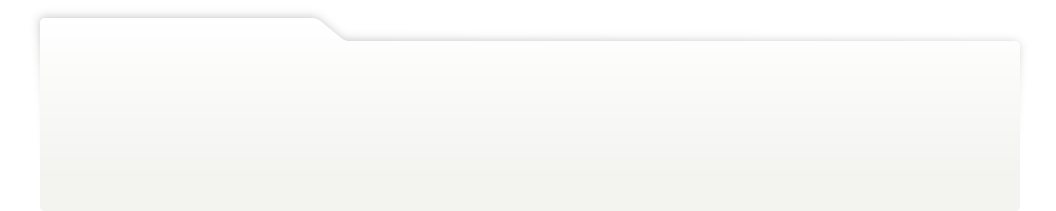
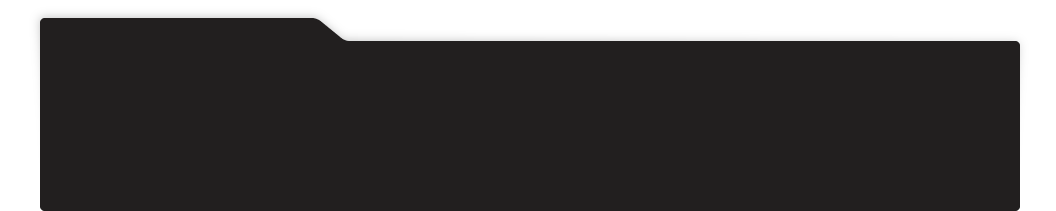
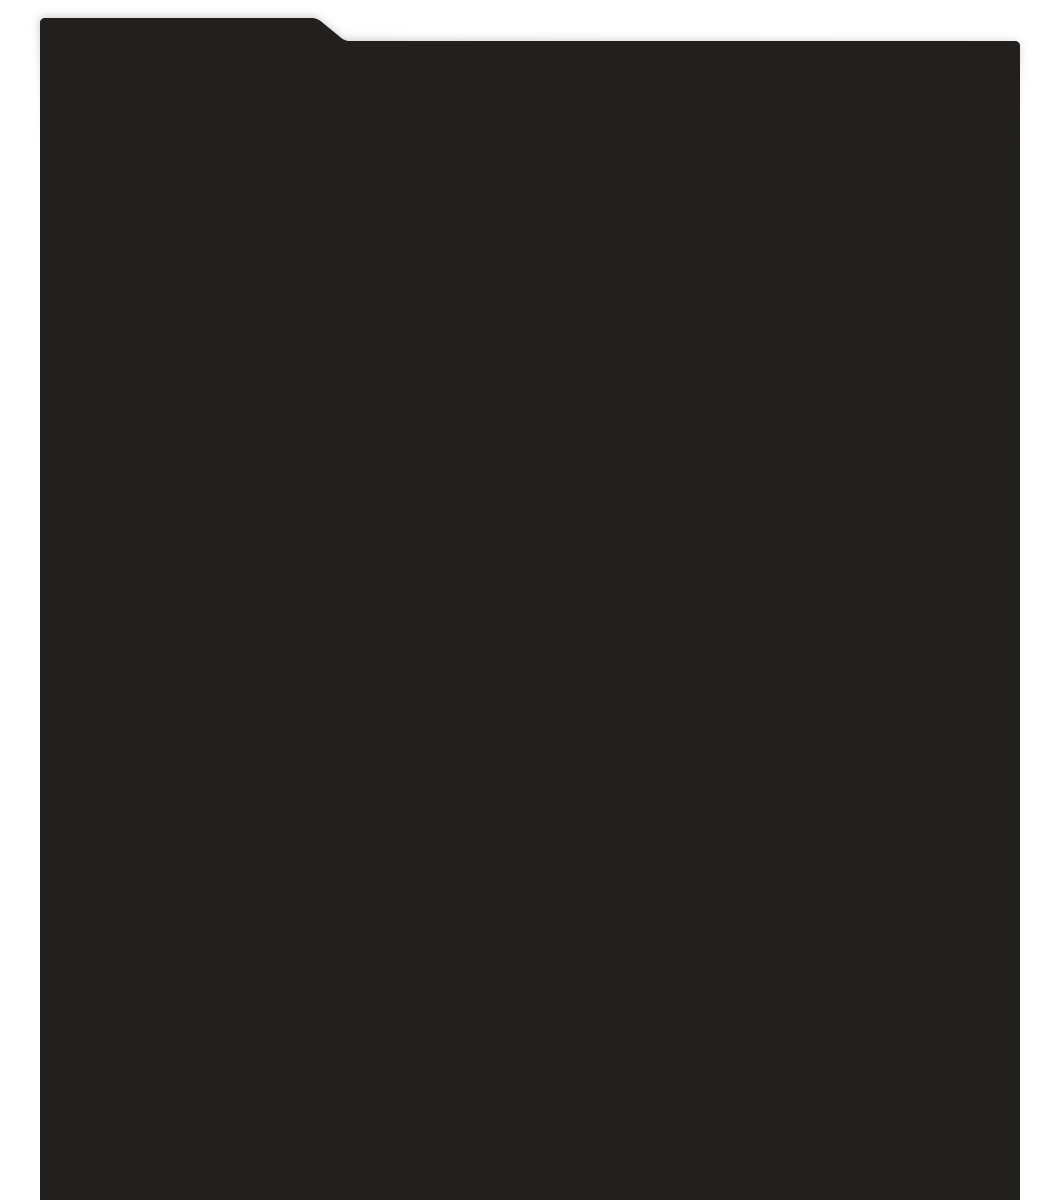
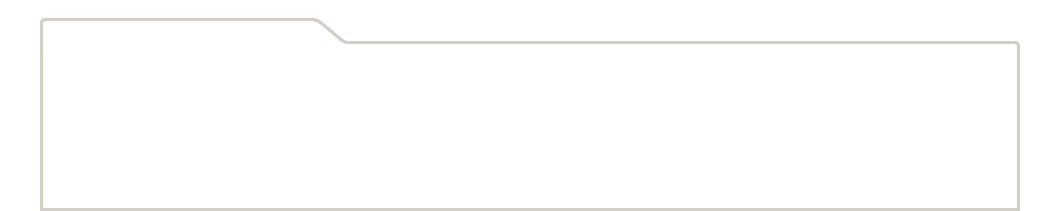
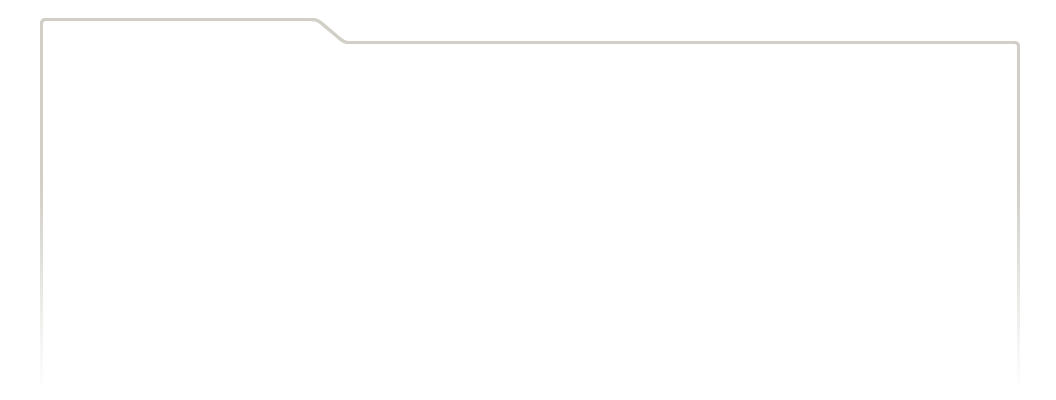
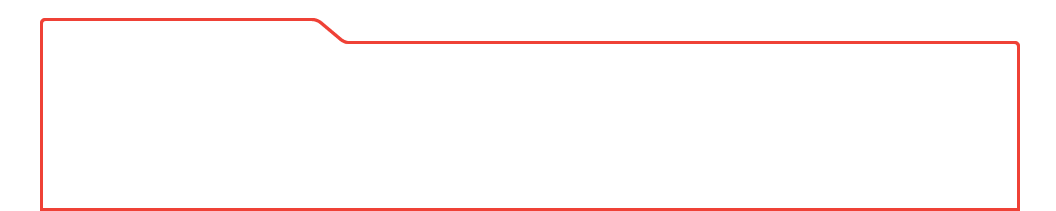
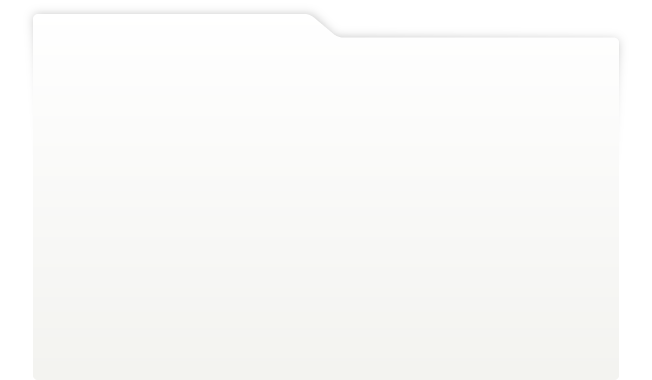
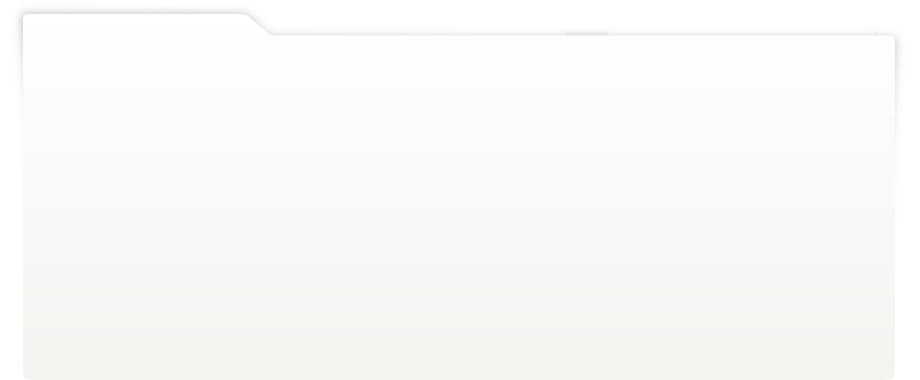
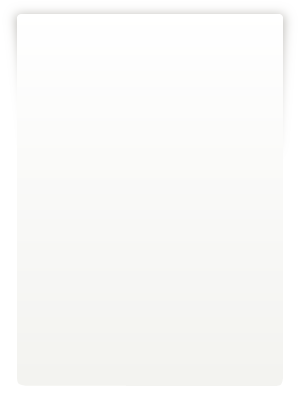
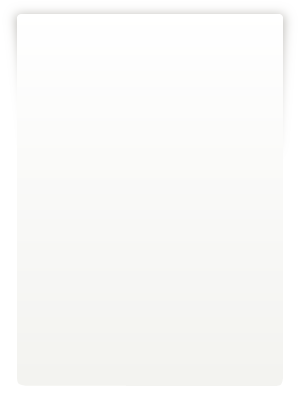
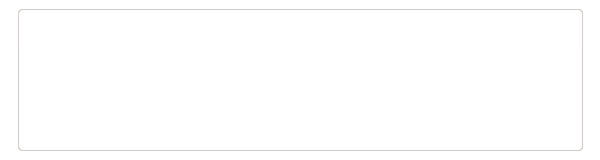
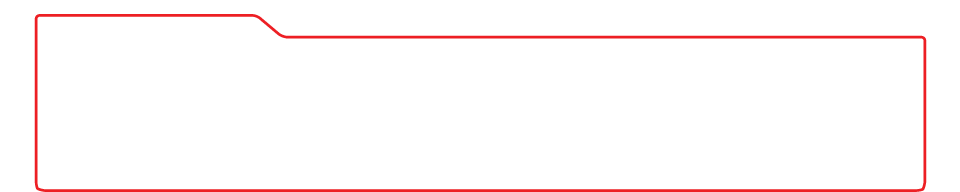
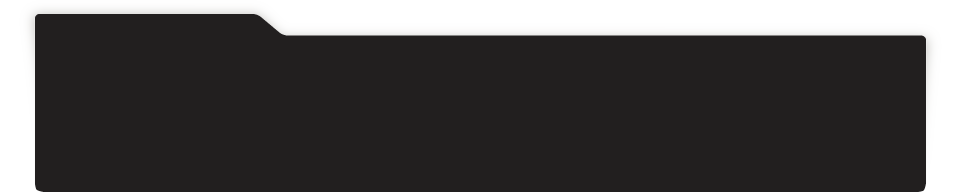
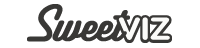
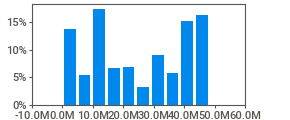
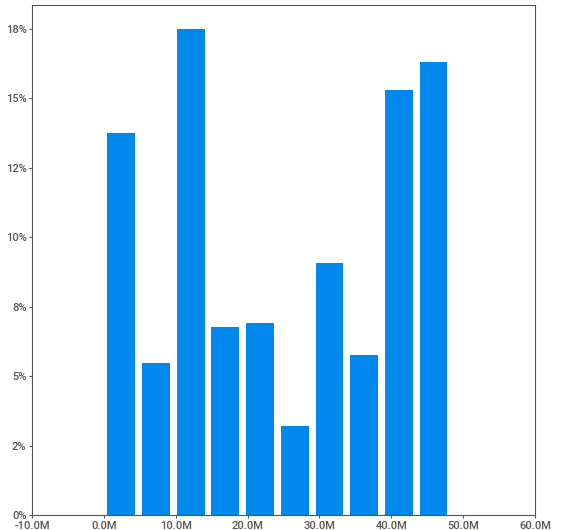
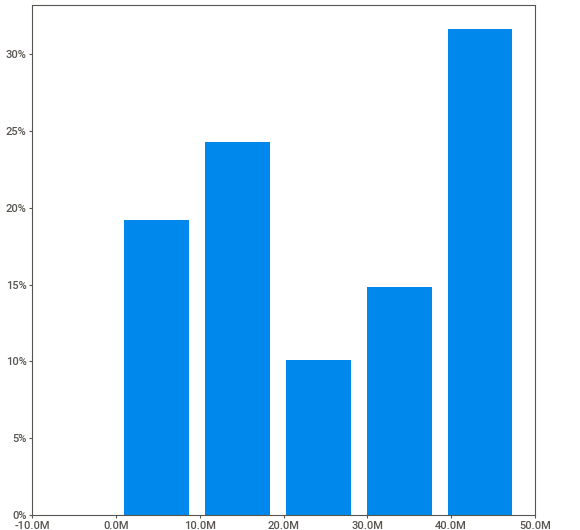
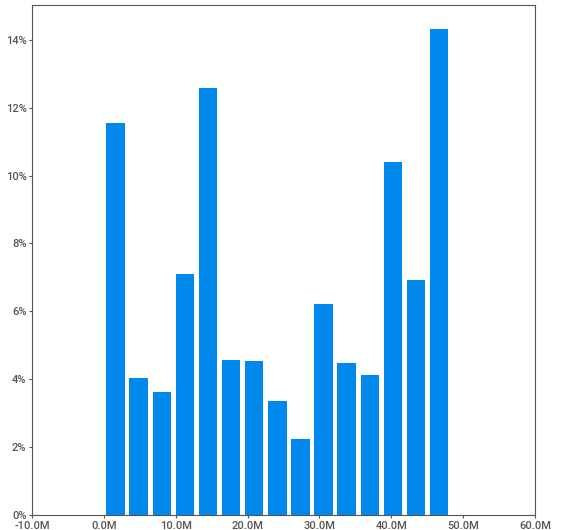
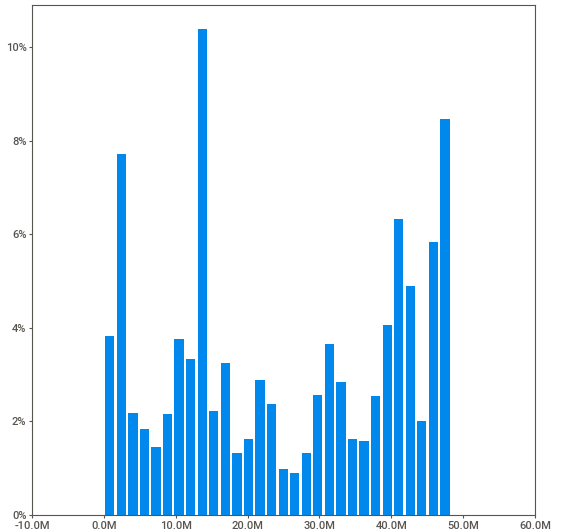
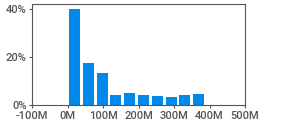
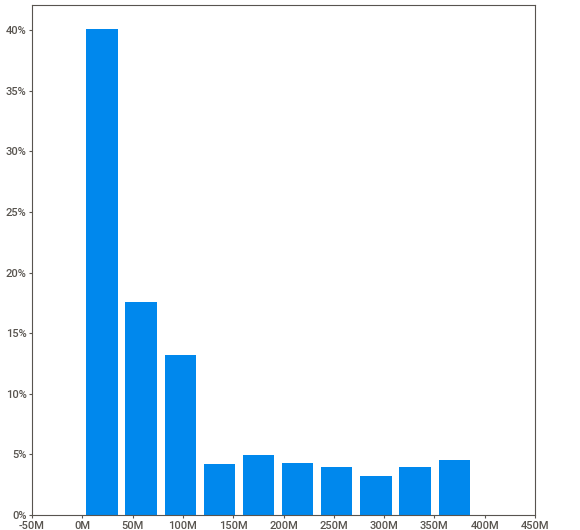
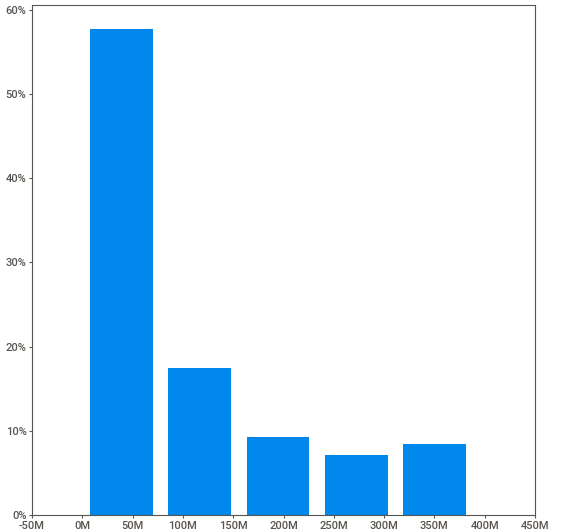
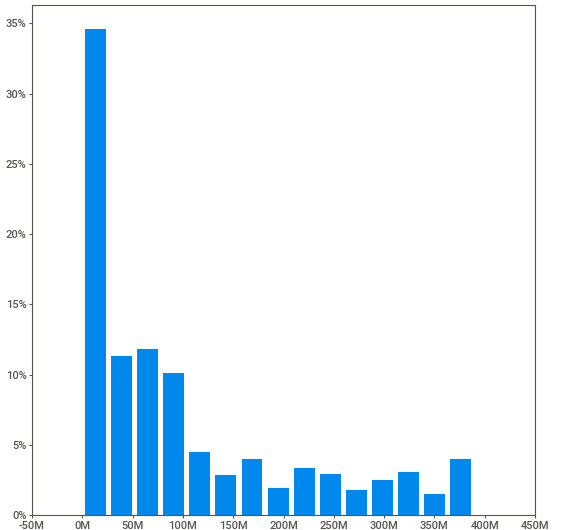
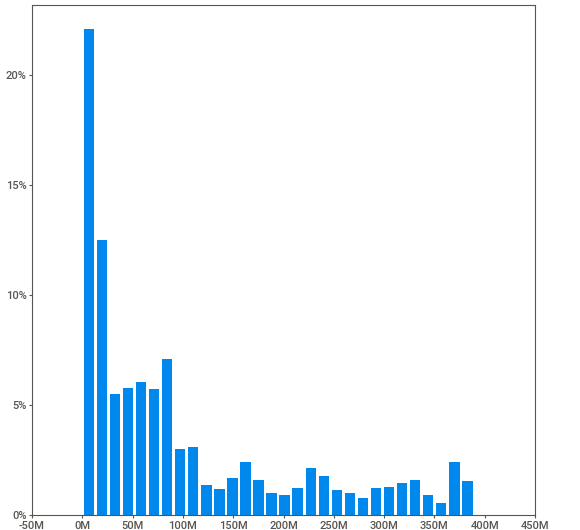
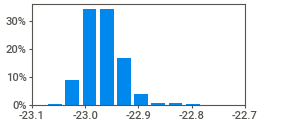
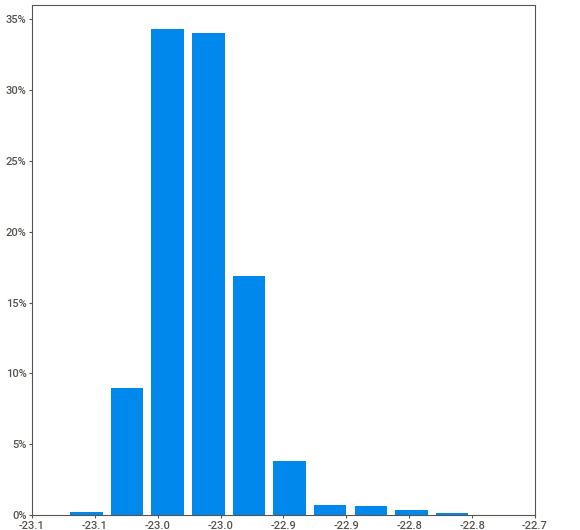
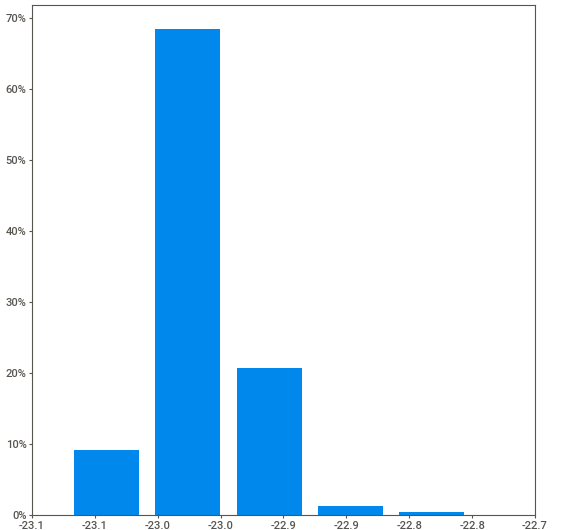
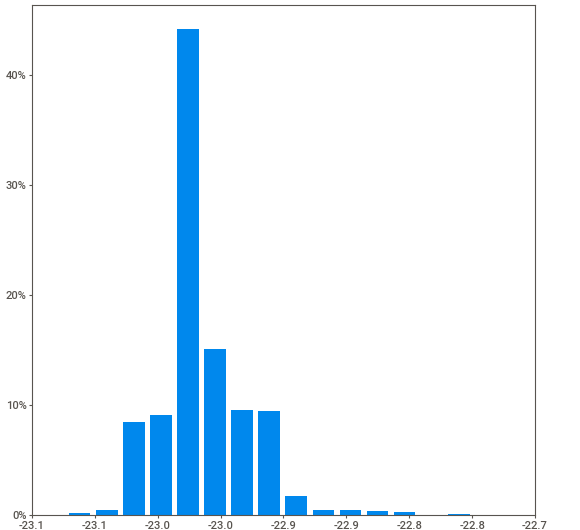
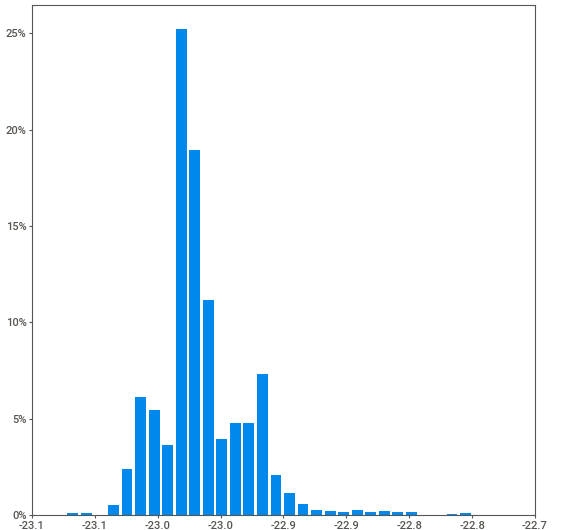
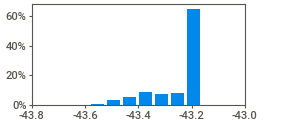
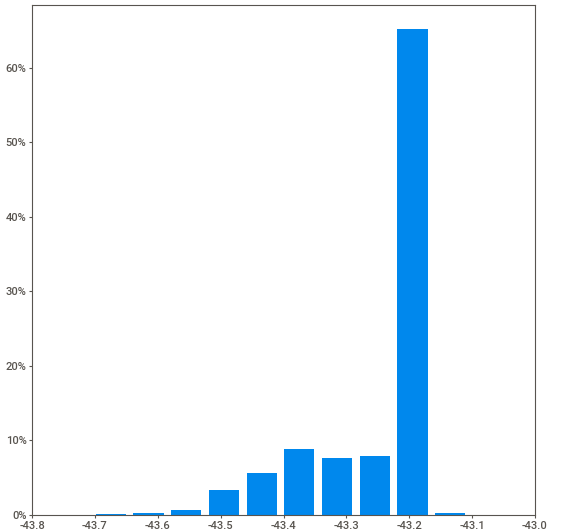
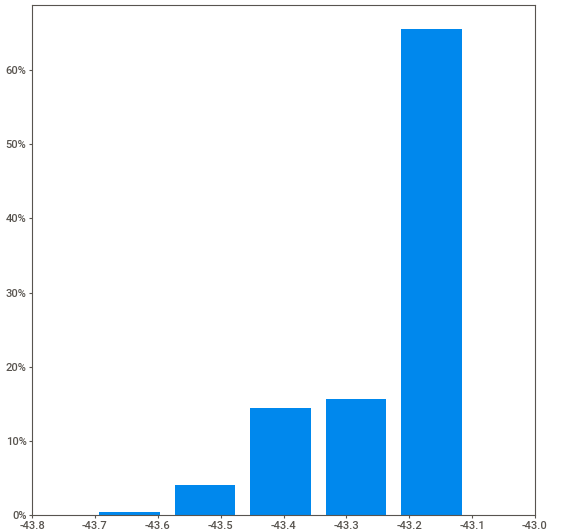
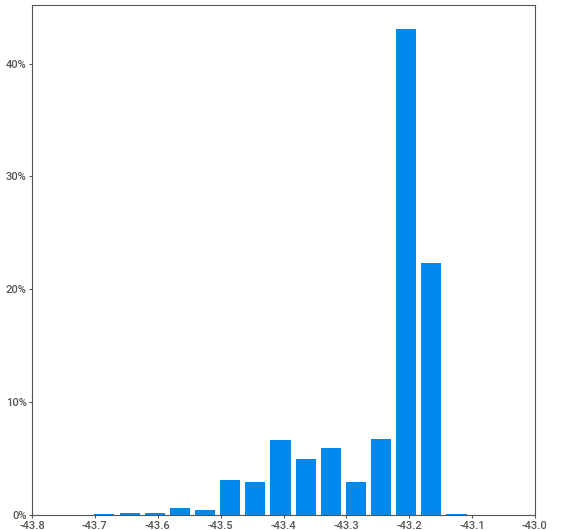
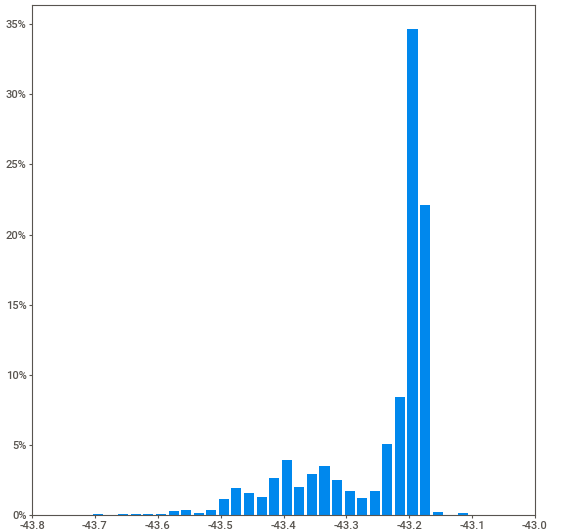
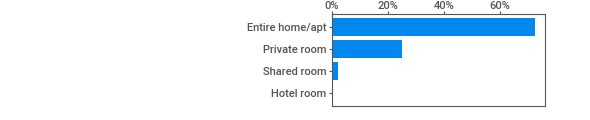
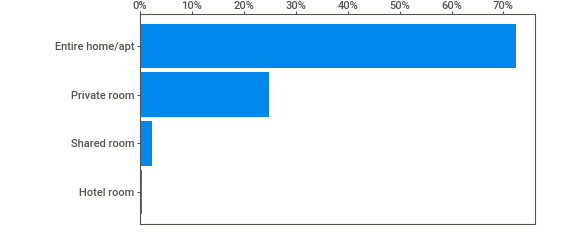
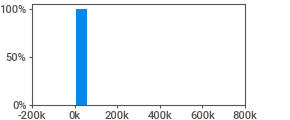
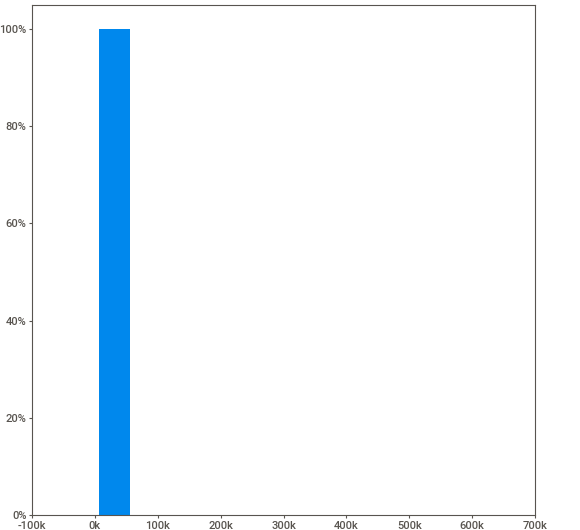
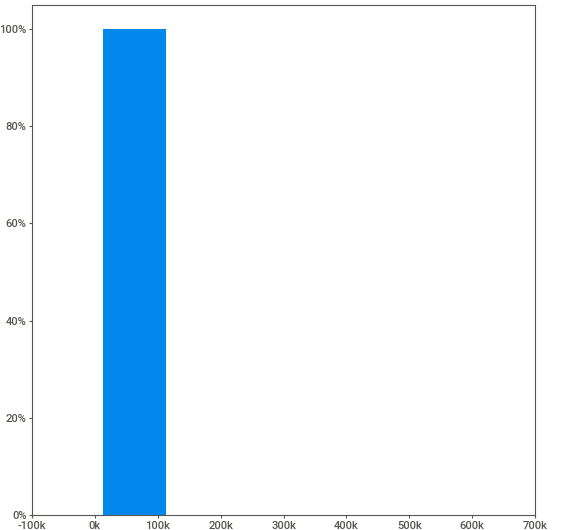
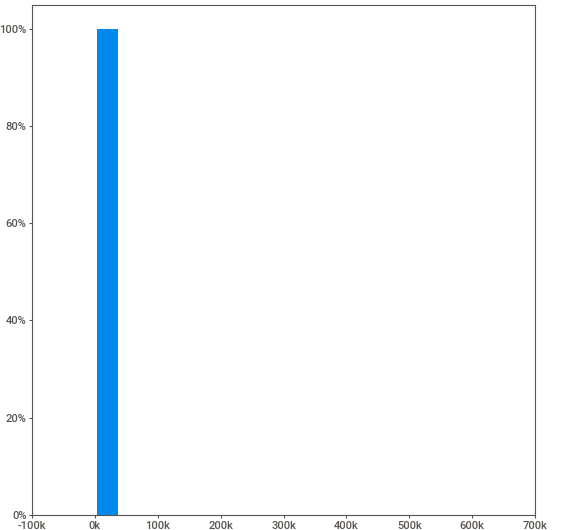
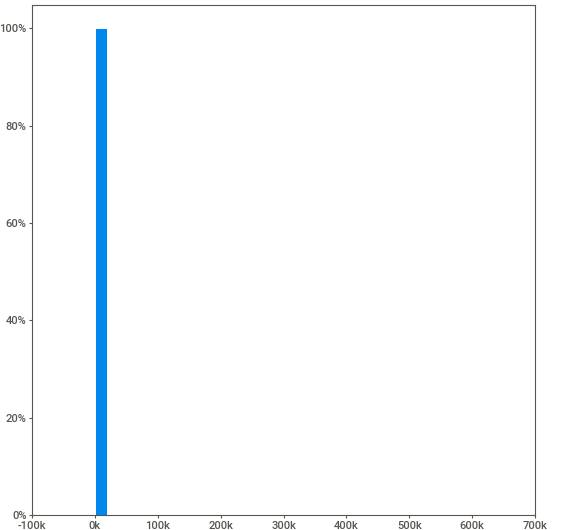
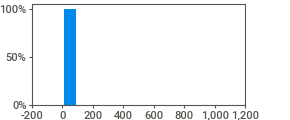
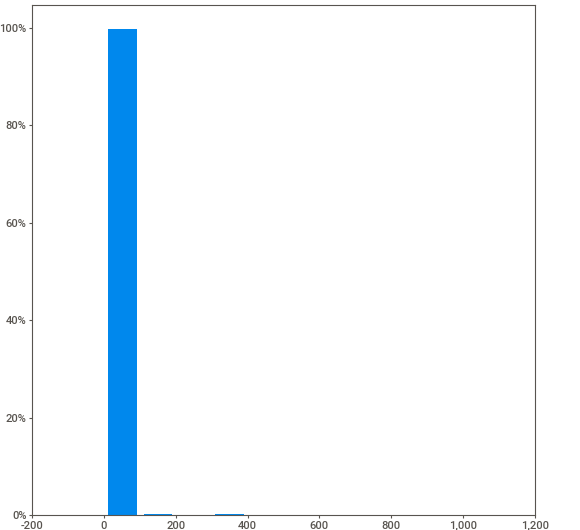
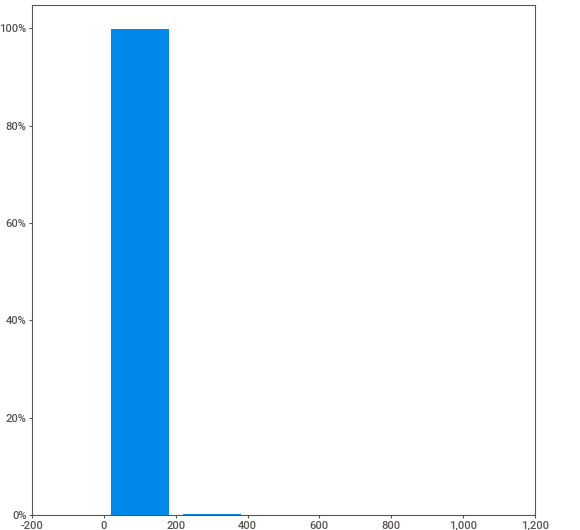
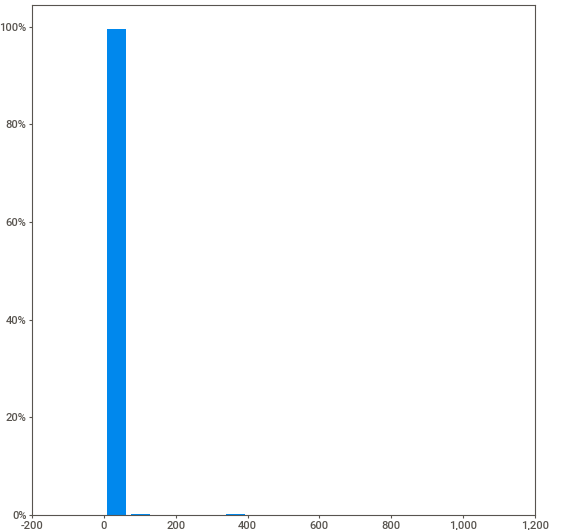
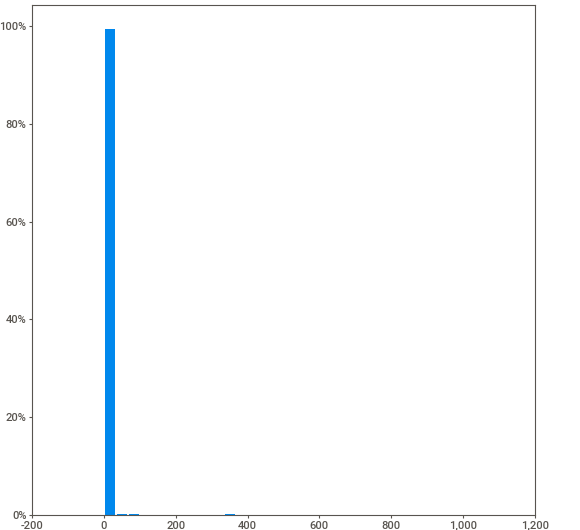
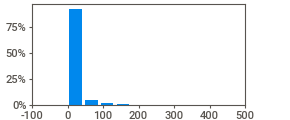
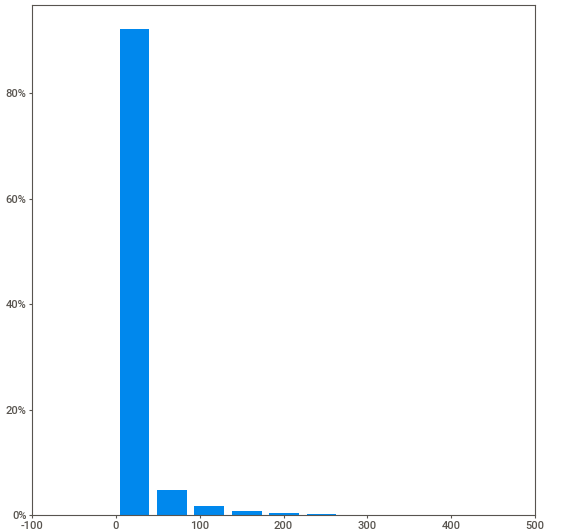
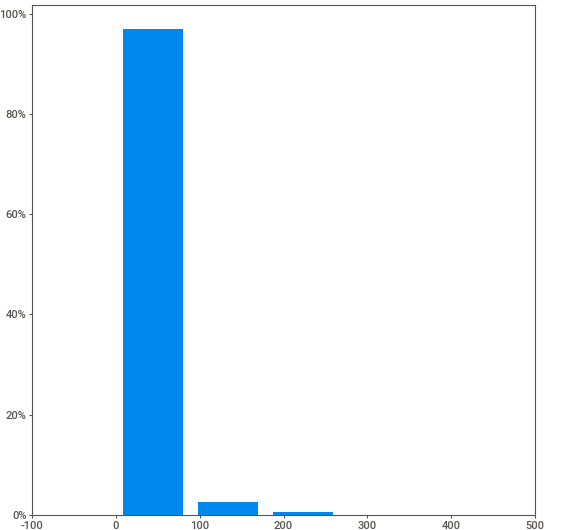
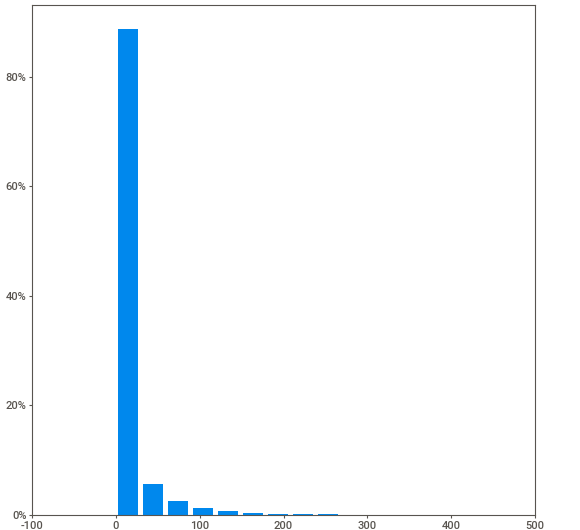
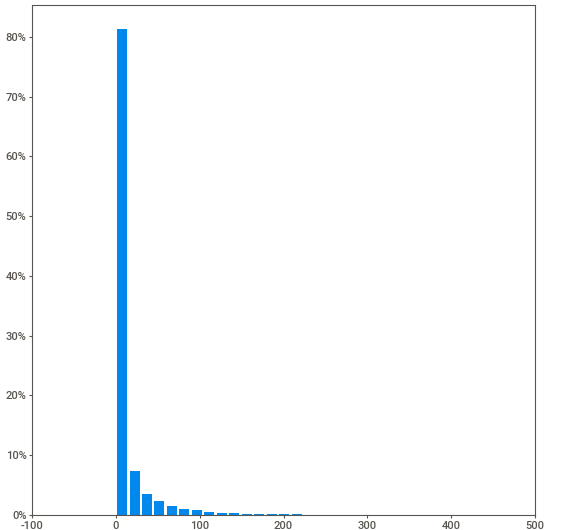
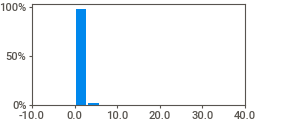
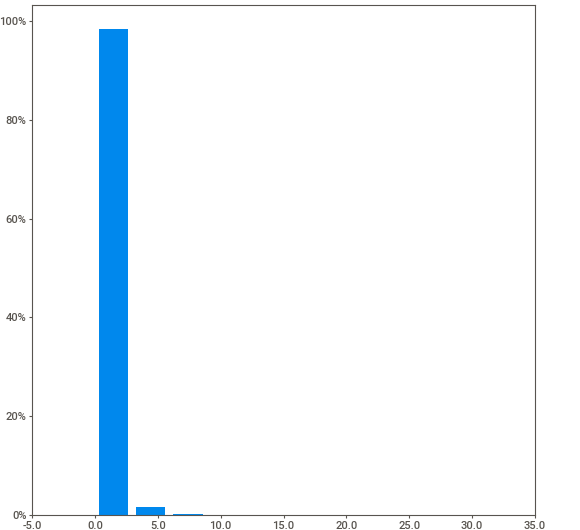
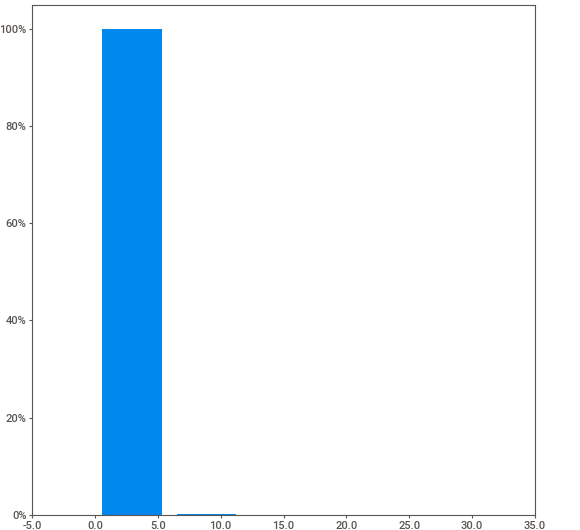
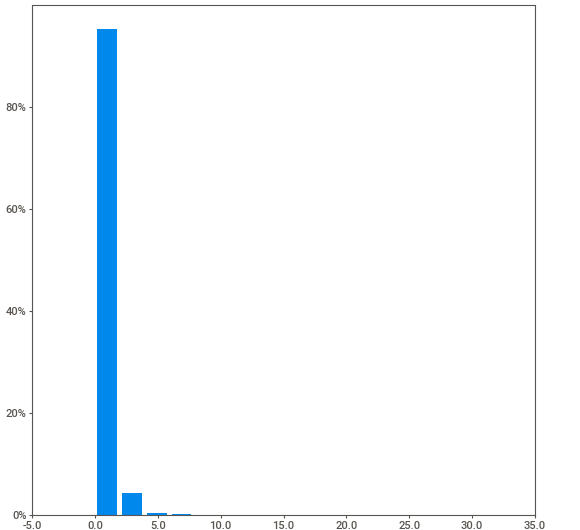
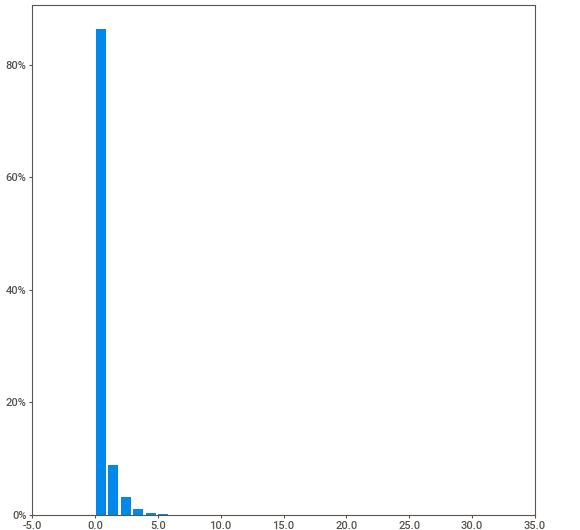
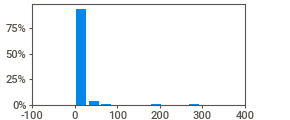
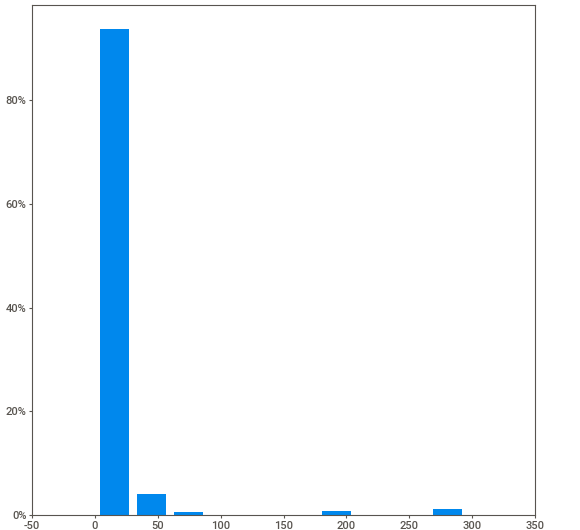
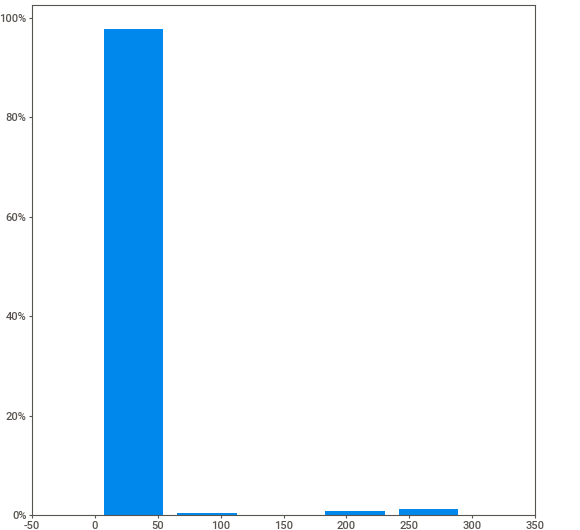
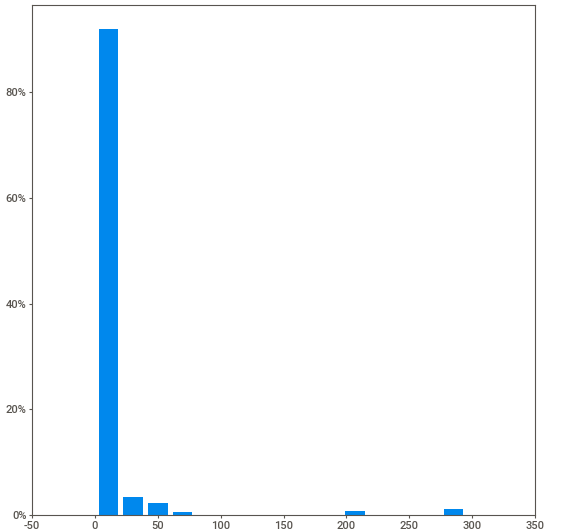
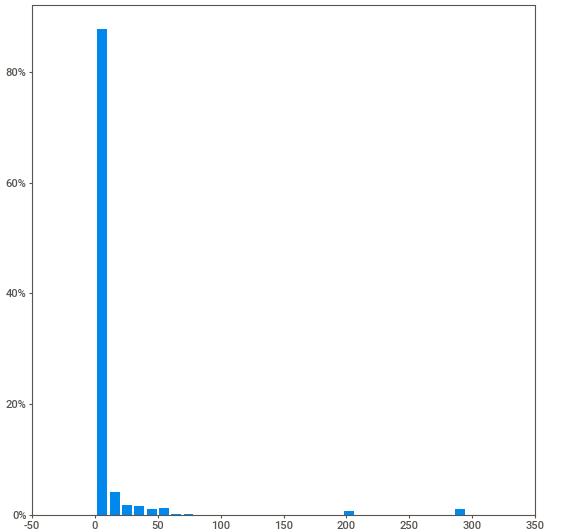
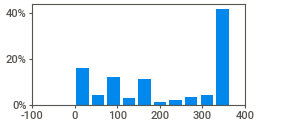
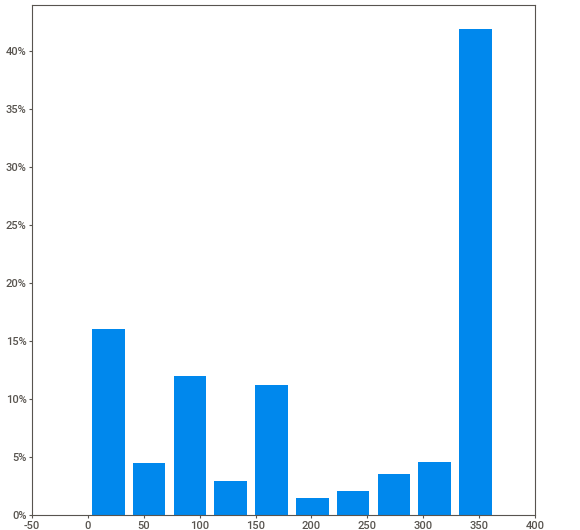
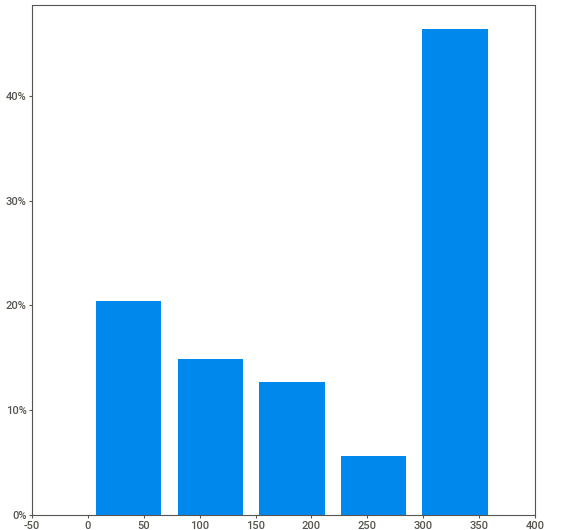
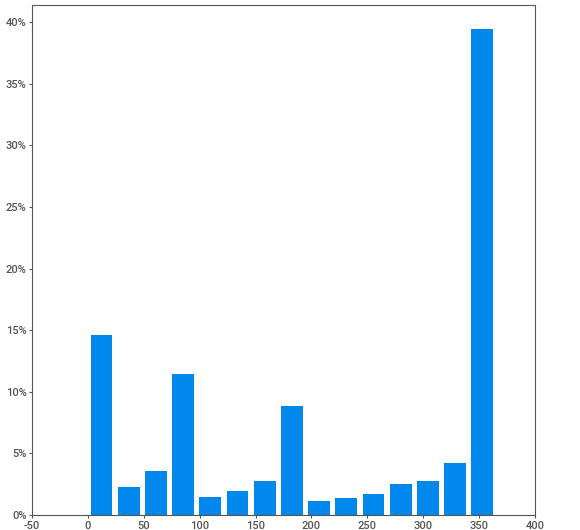
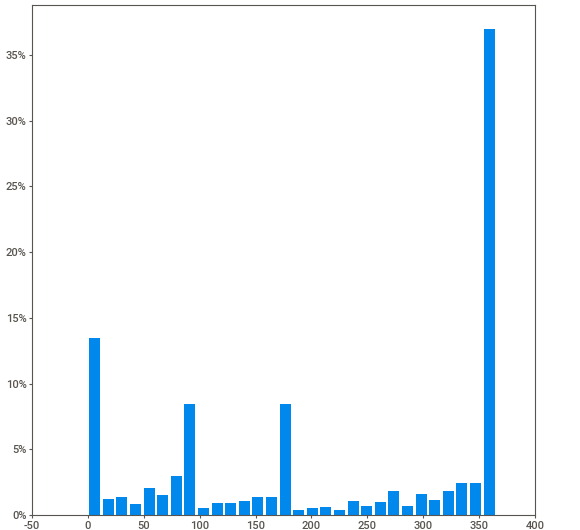
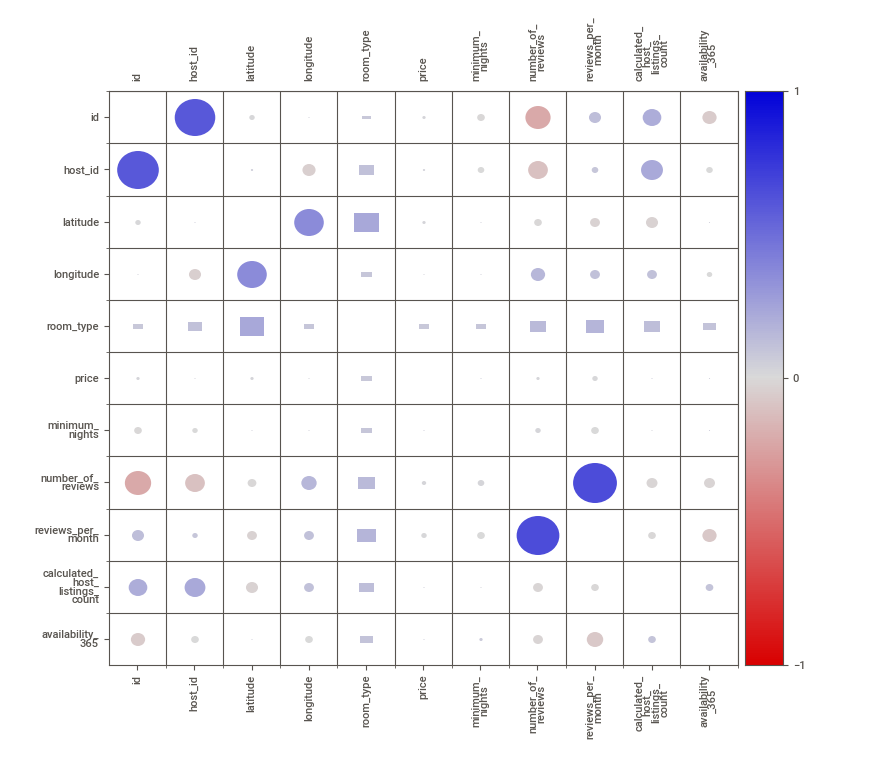
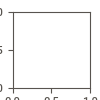

In [8]:
report_listings = sv.analyze(listings)

report_listings.show_notebook()

As we can see, there is still a need for some data munging. I direct your attention specially to the distribuition of $\textbf{price}$ and  $\textbf{minimun_nights}$, where there seems to be some extraordinary value placement. I will set some limits to our data for a more accurate analysis.

In [20]:
listings.where(listings.price < 10000, inplace = True)
listings.where(listings.minimum_nights < 400, inplace = True)

                                             |                                             | [  0%]   00:00 ->…


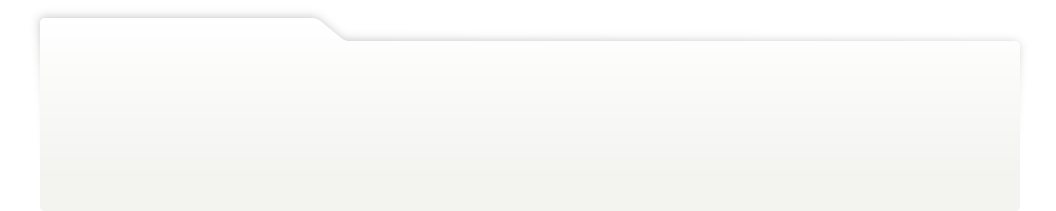
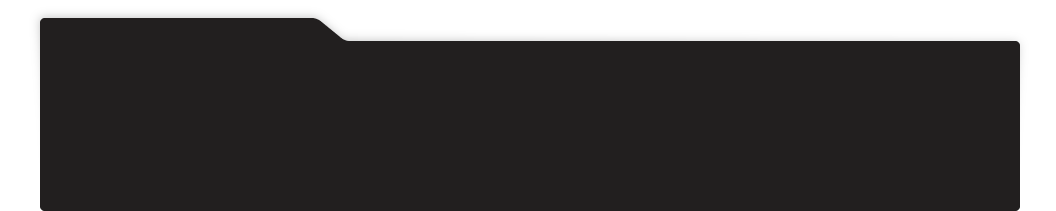
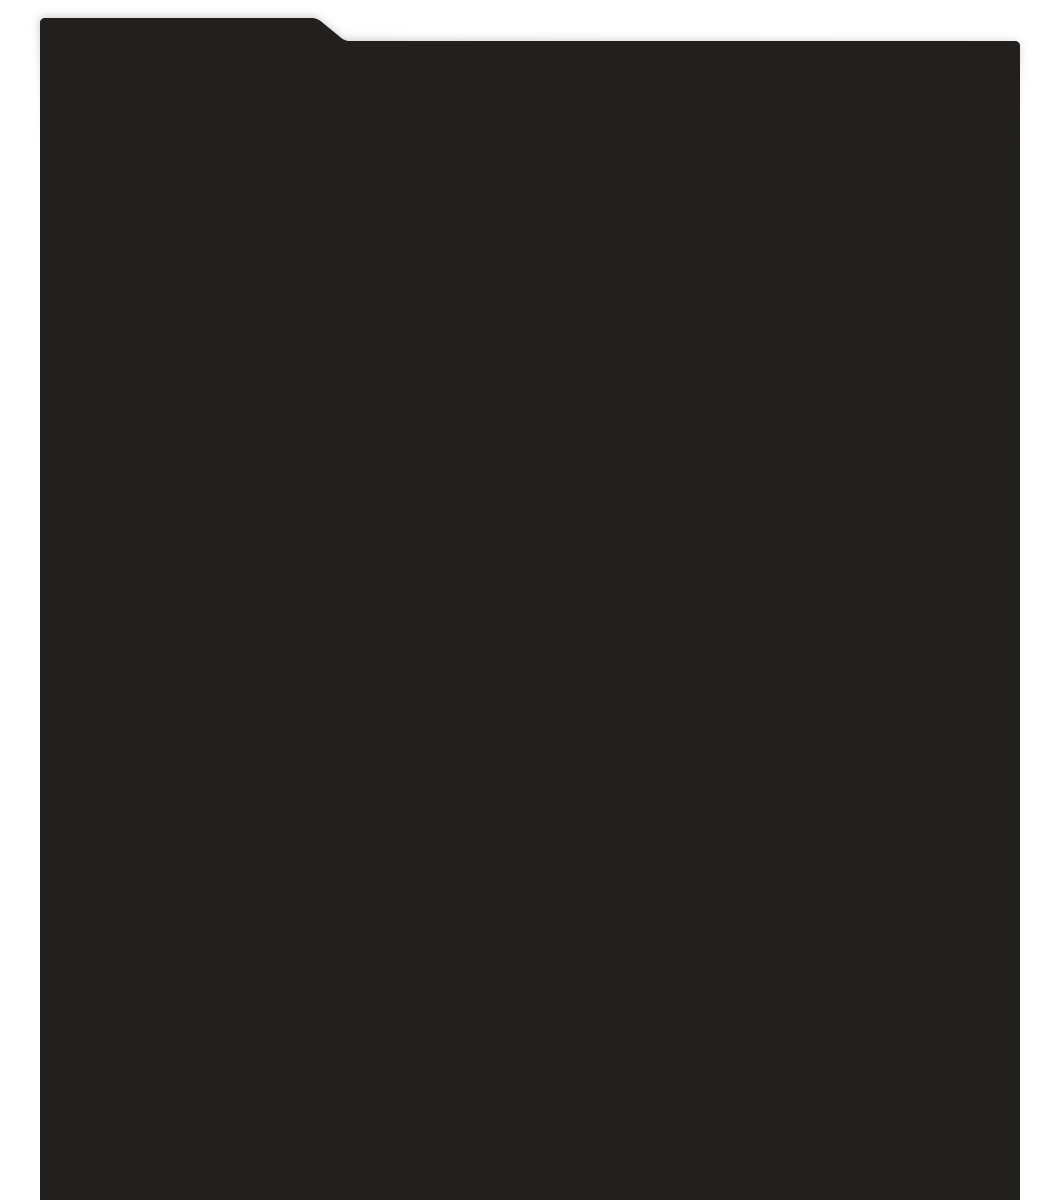
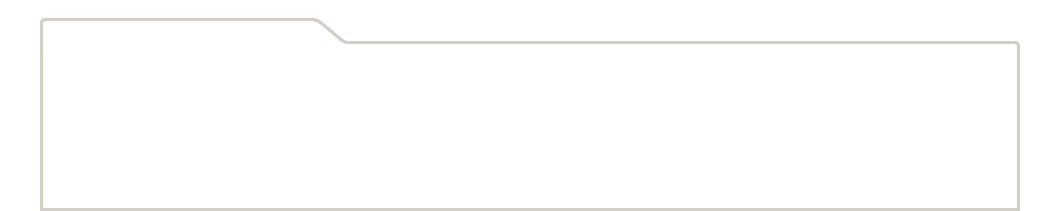
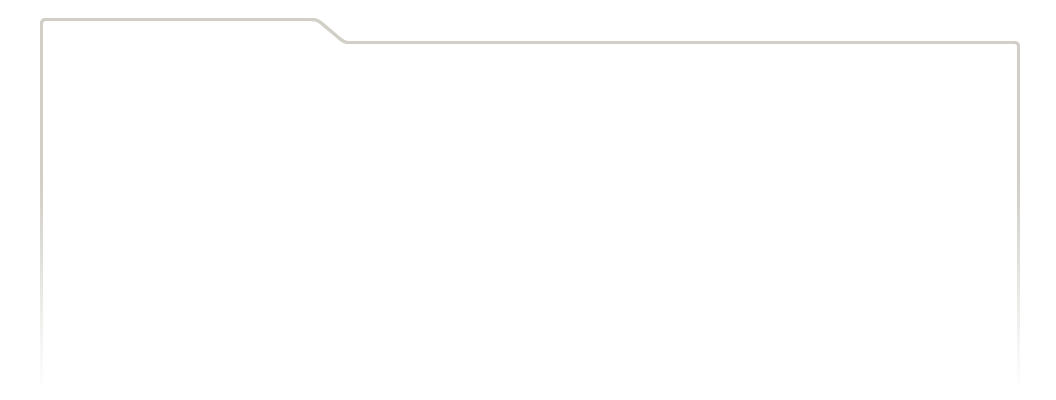
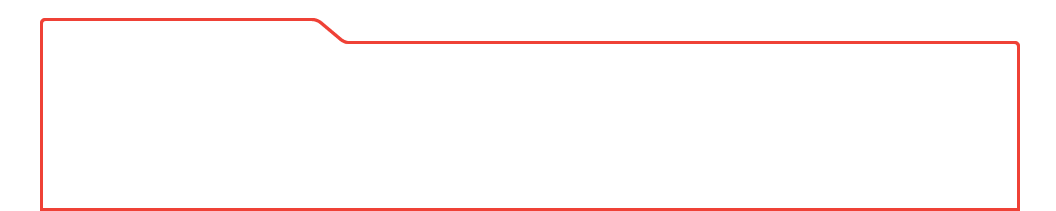
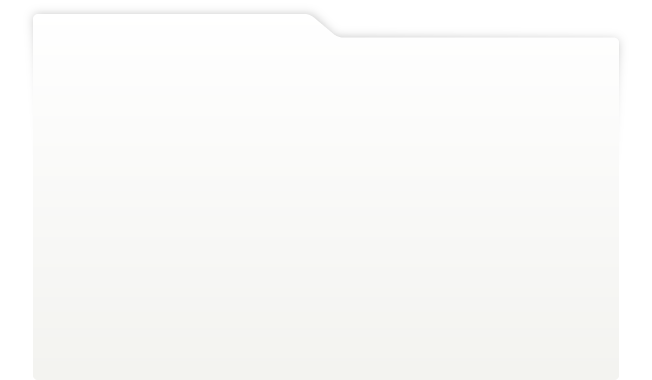
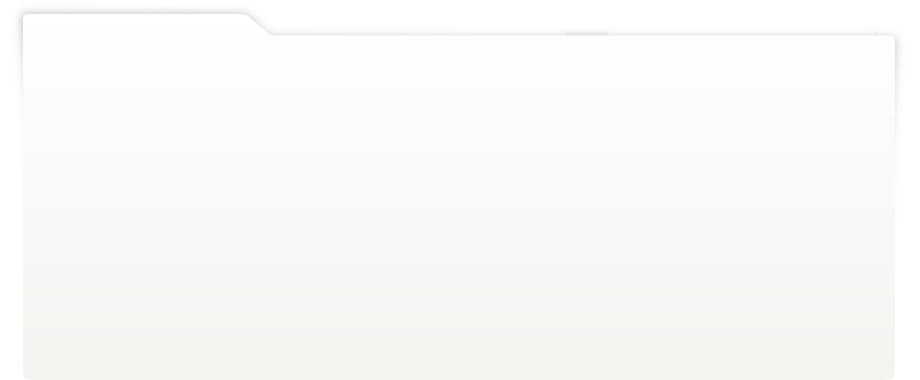
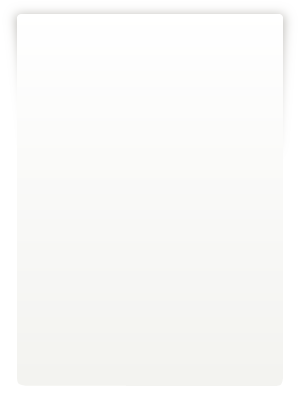
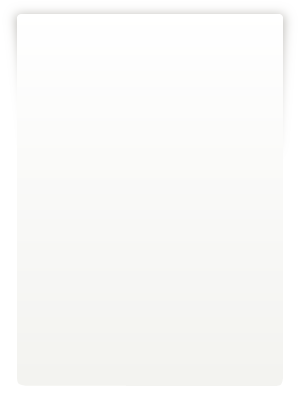
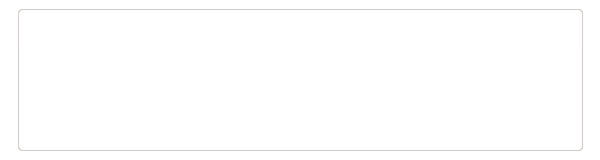
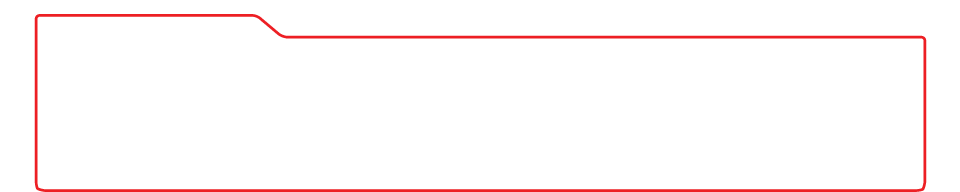
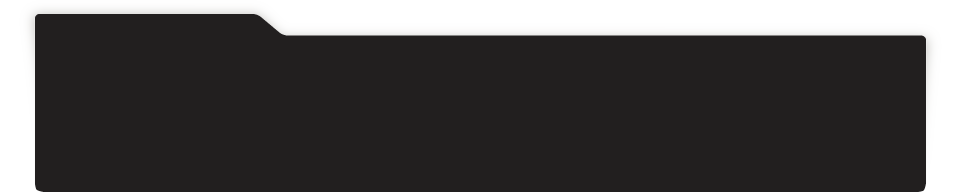
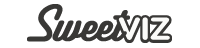
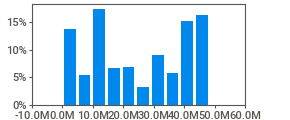
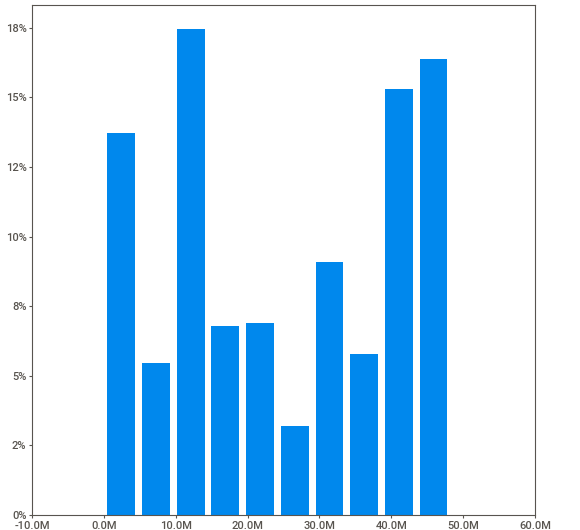
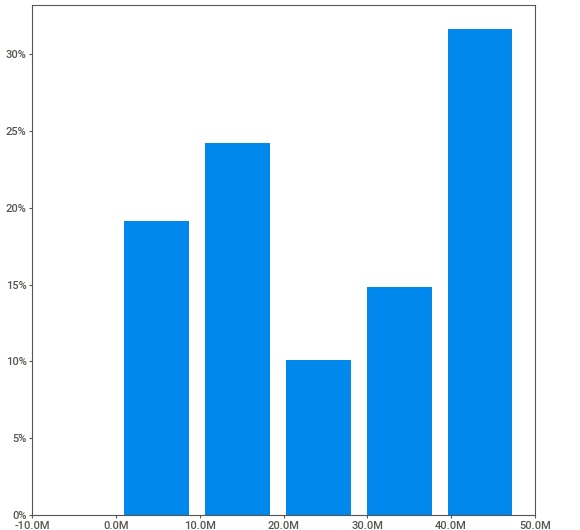
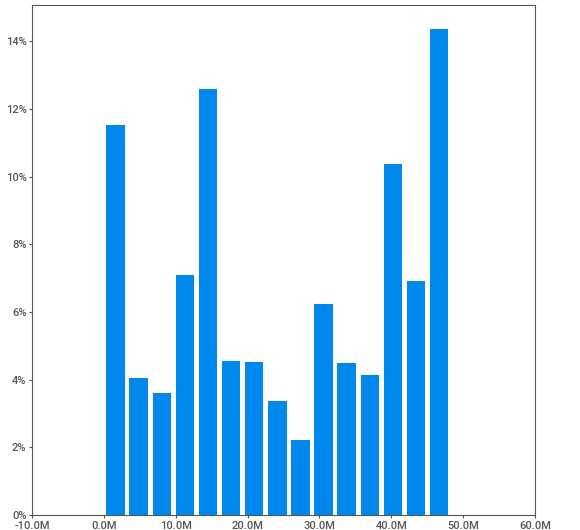
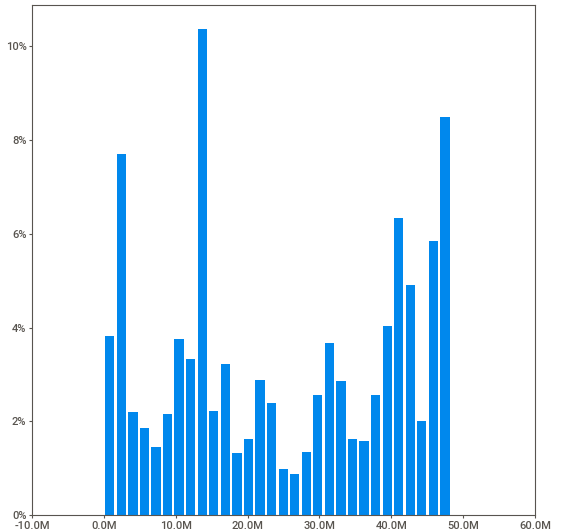
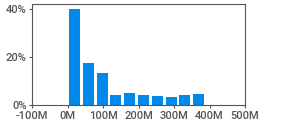
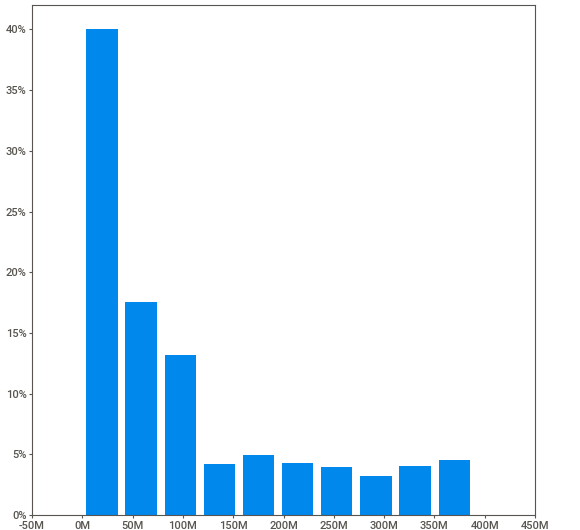
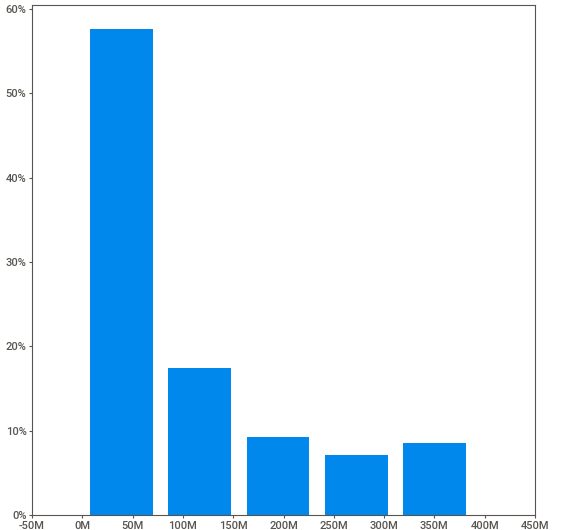
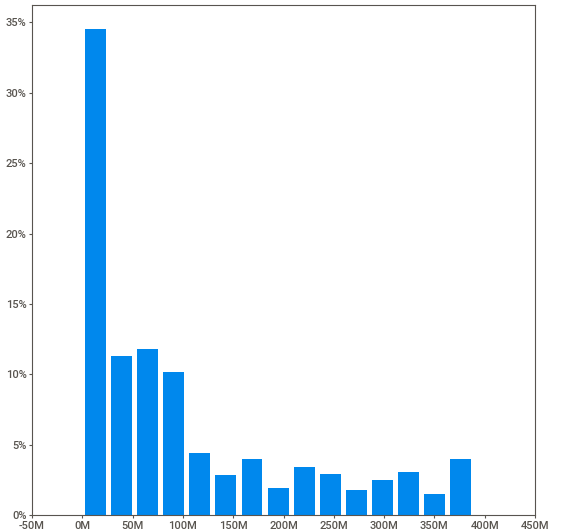
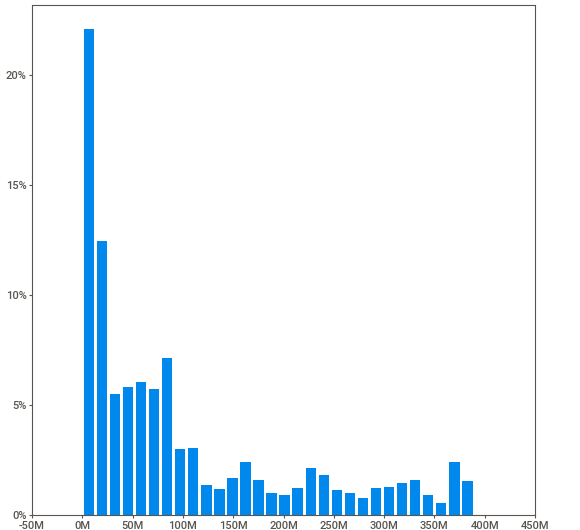
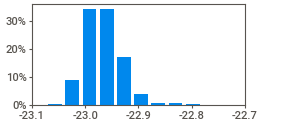
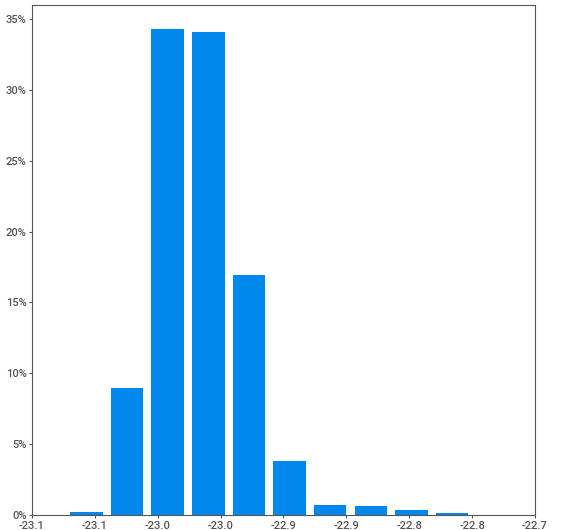
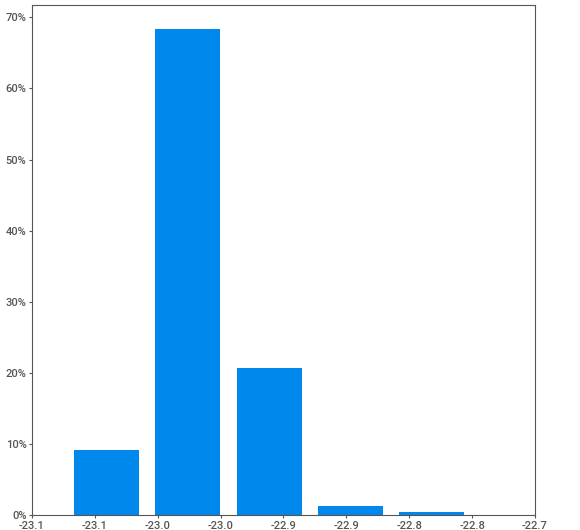
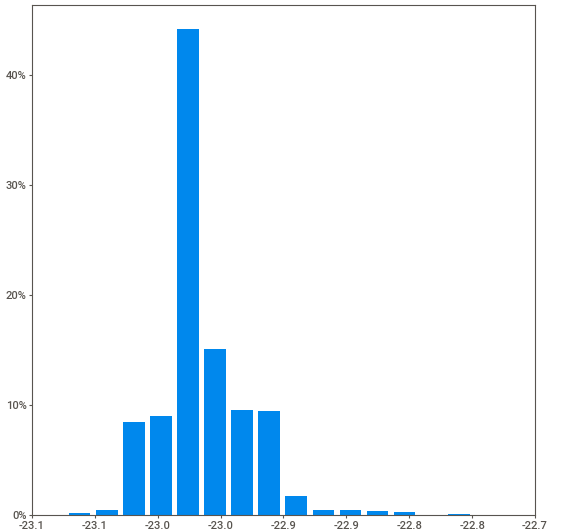
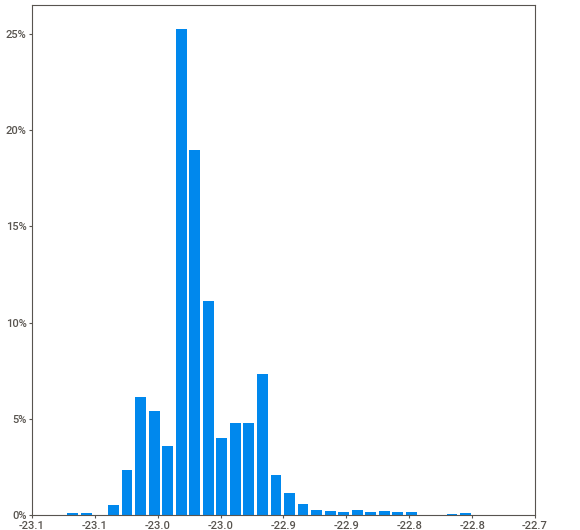
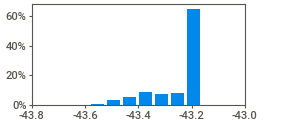
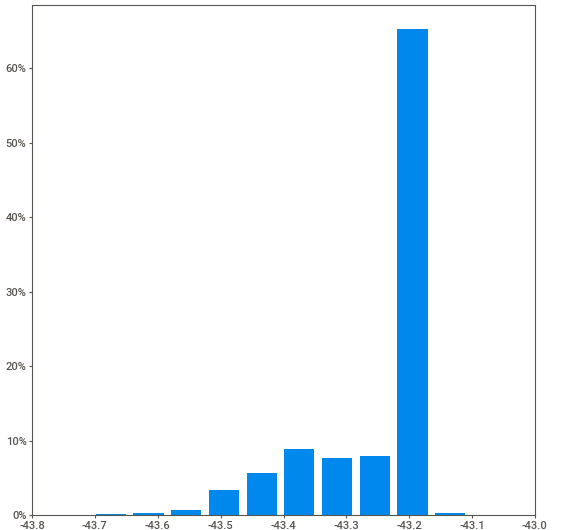
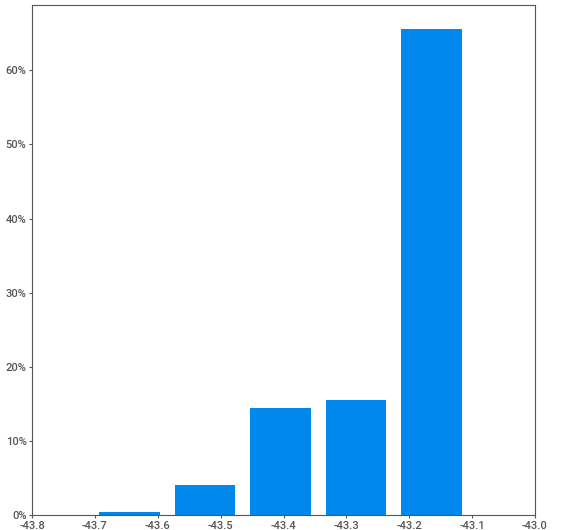
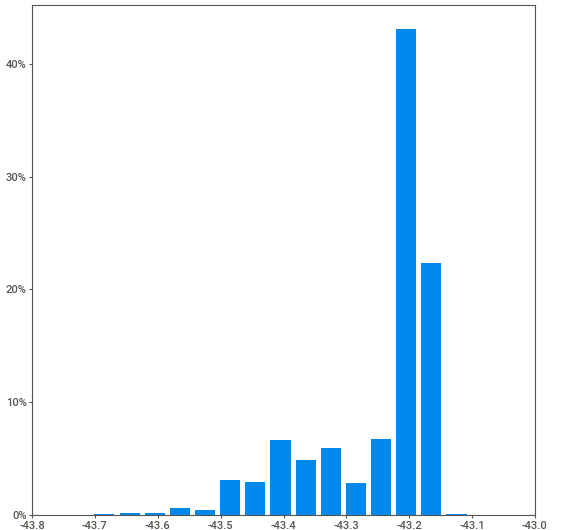
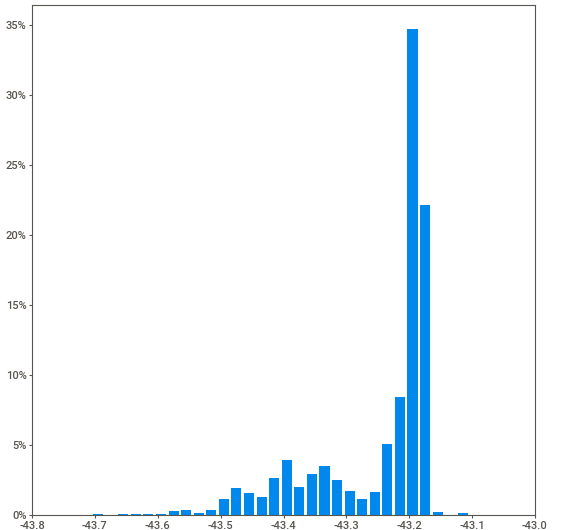
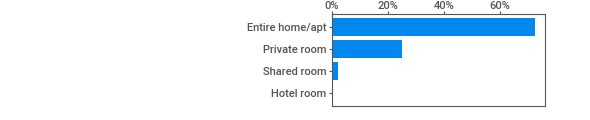
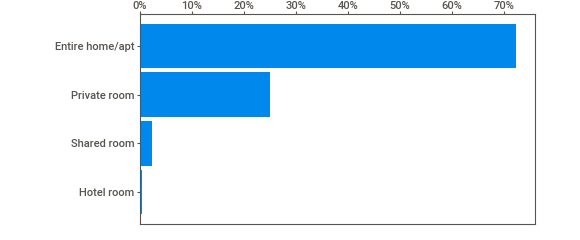
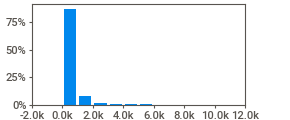
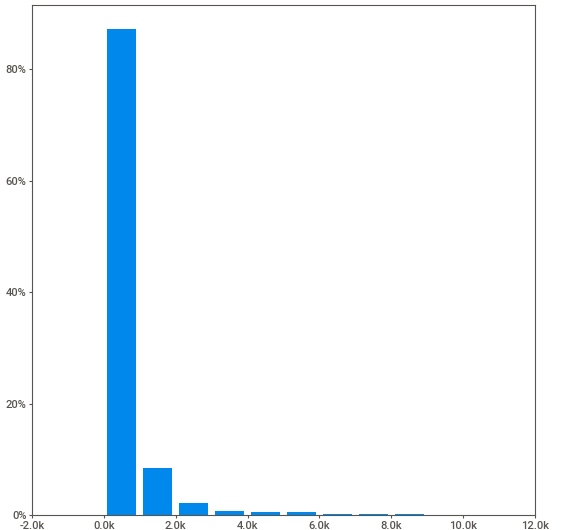
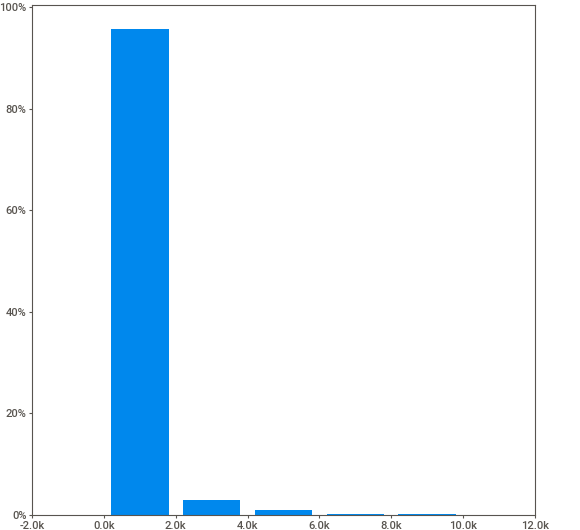
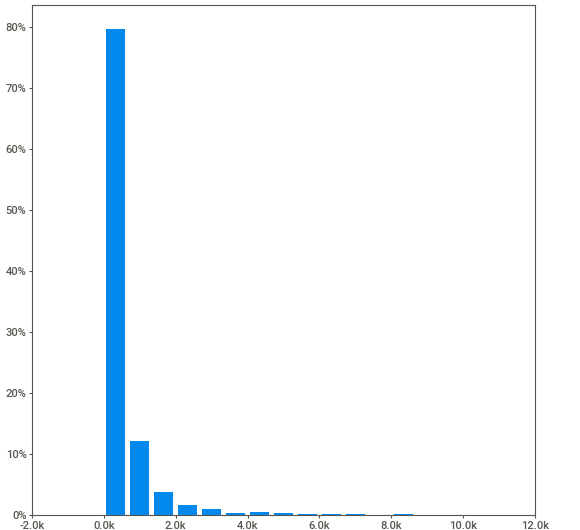
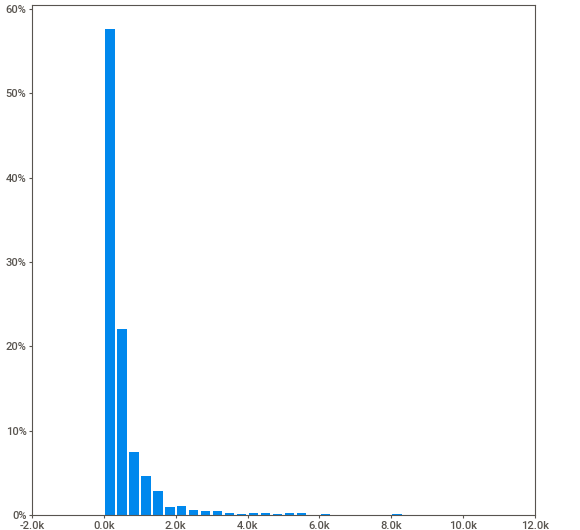
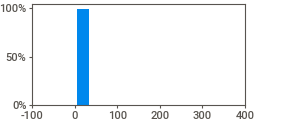
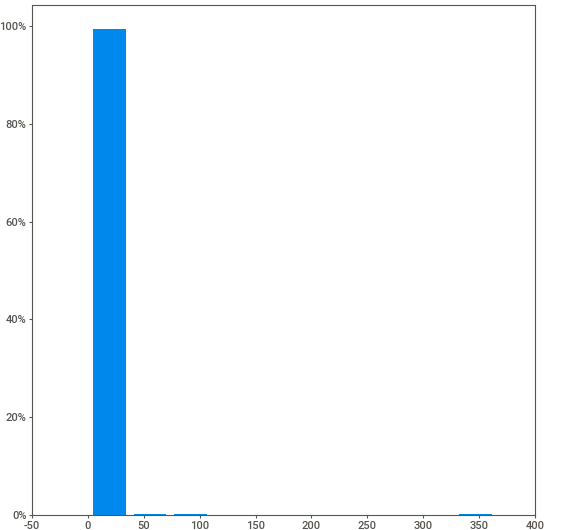
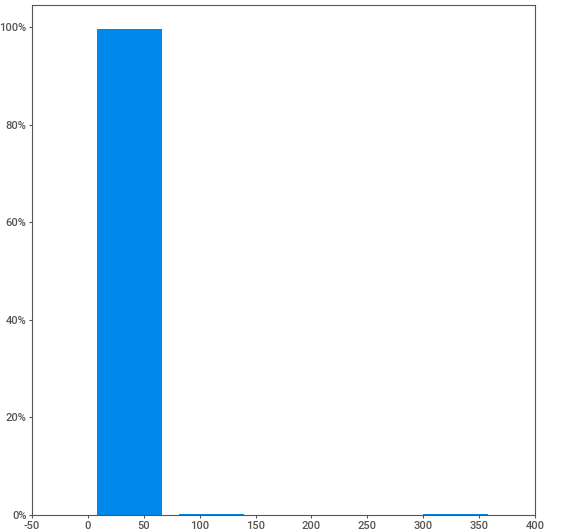
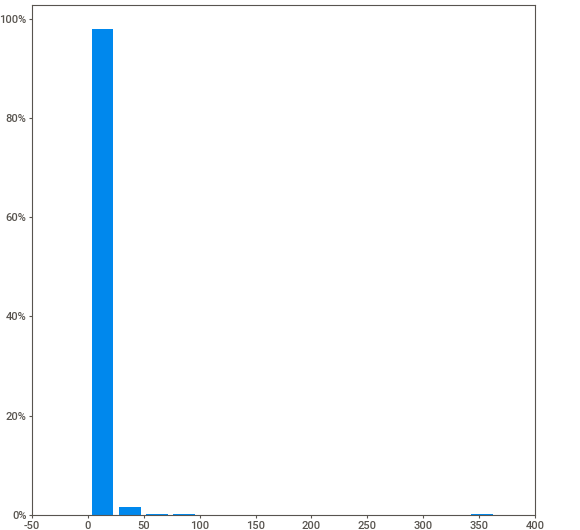
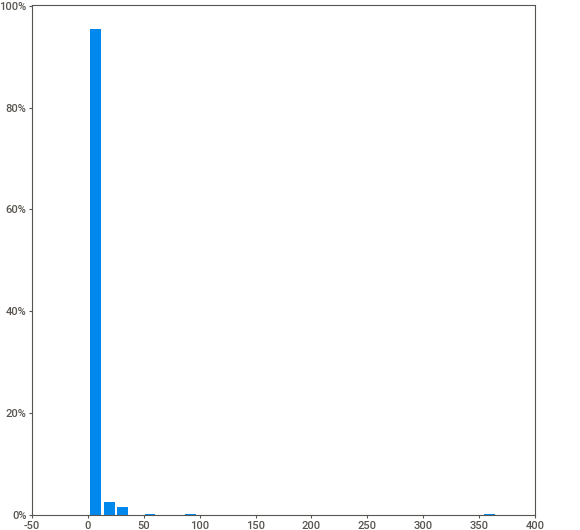
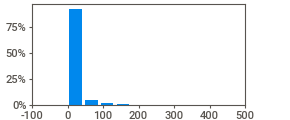
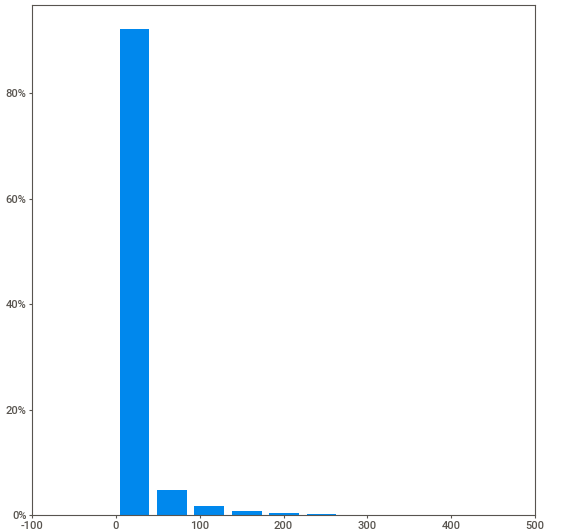
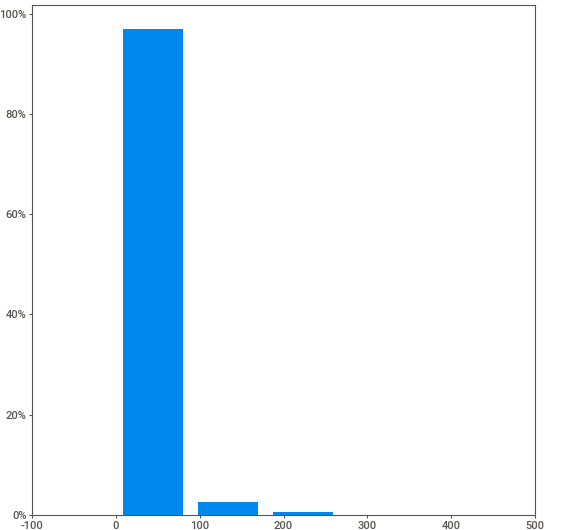
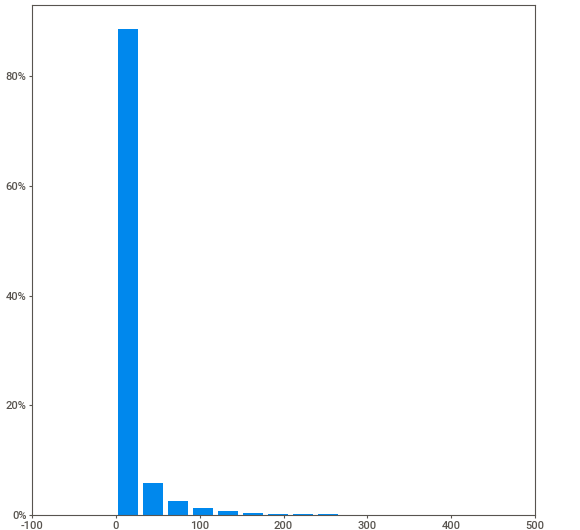
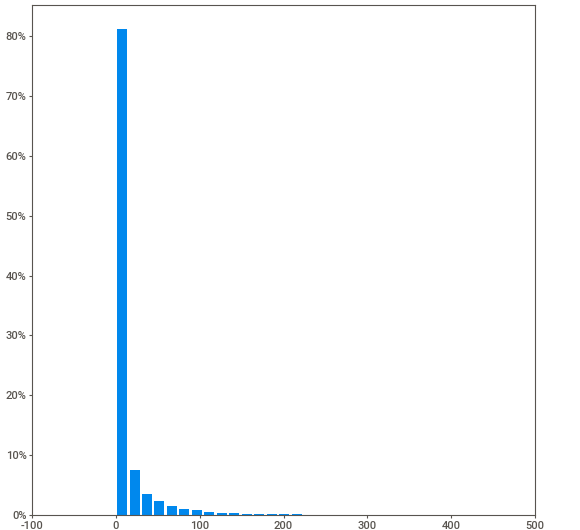
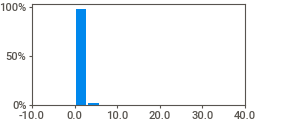
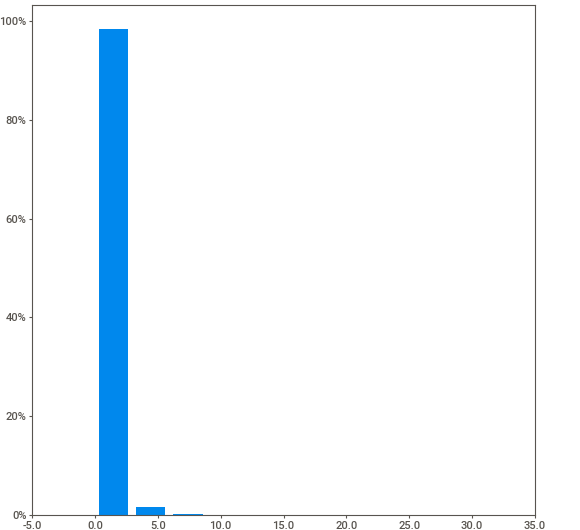
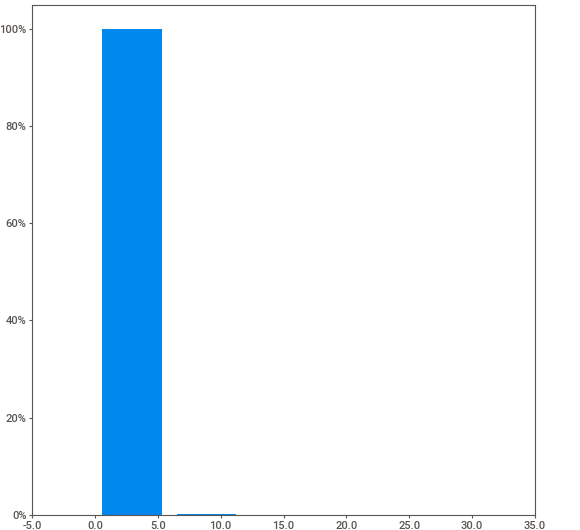
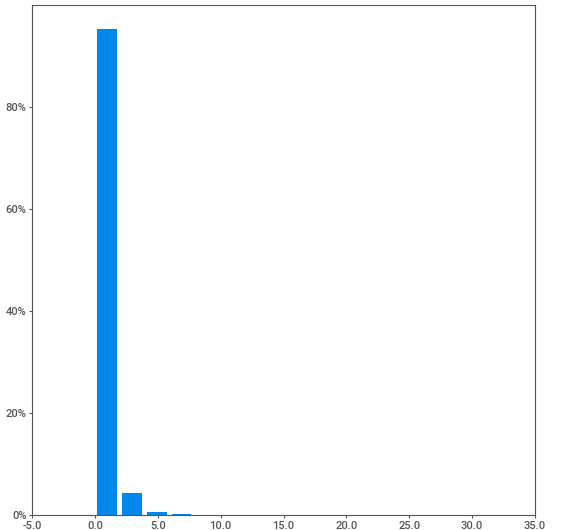
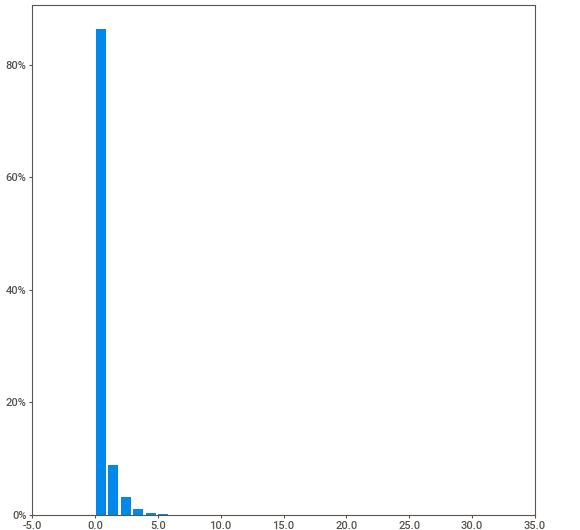
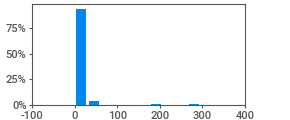
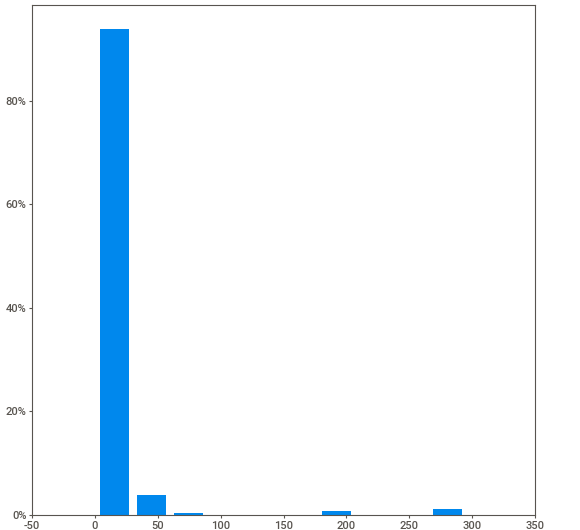
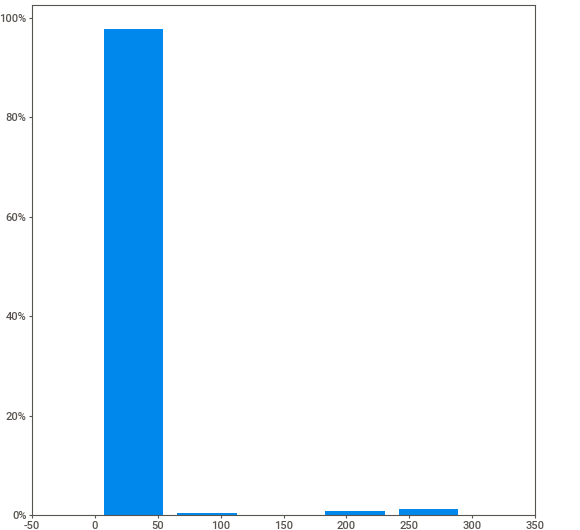
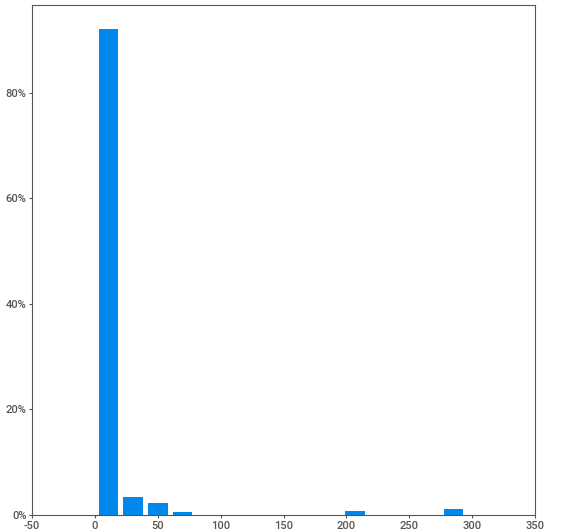
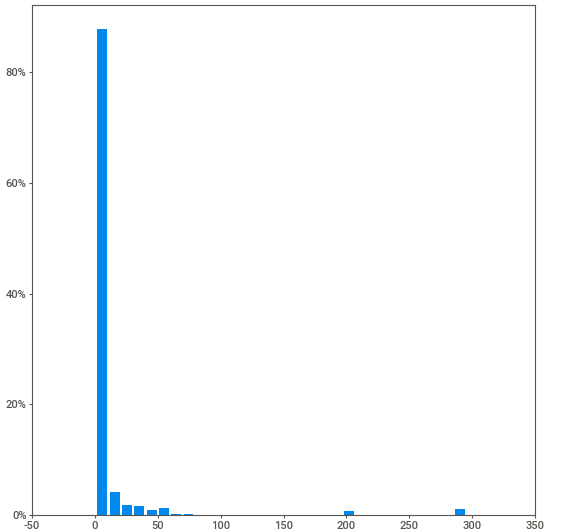
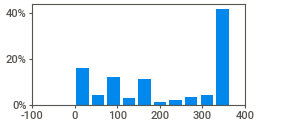
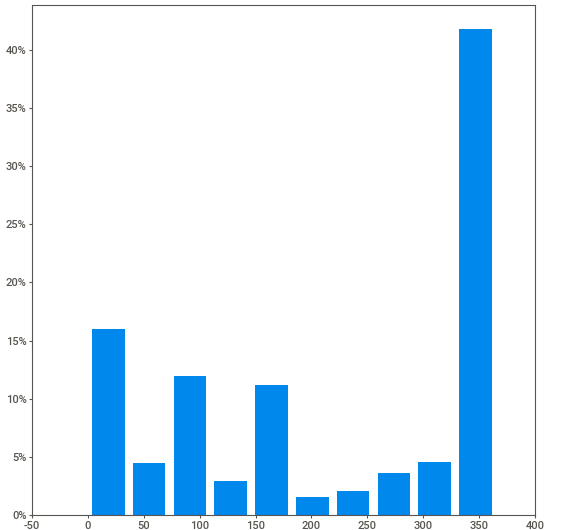
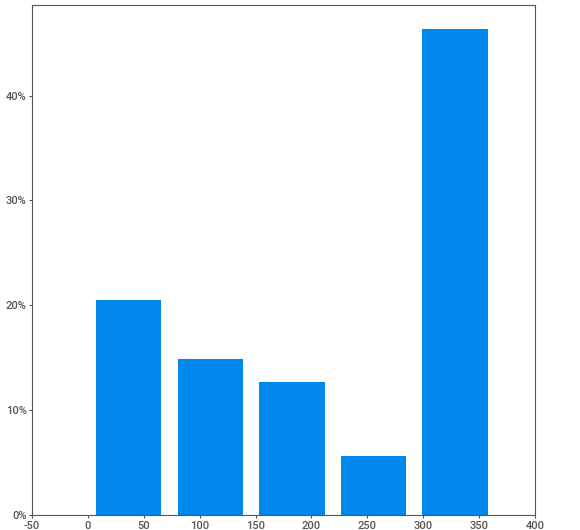
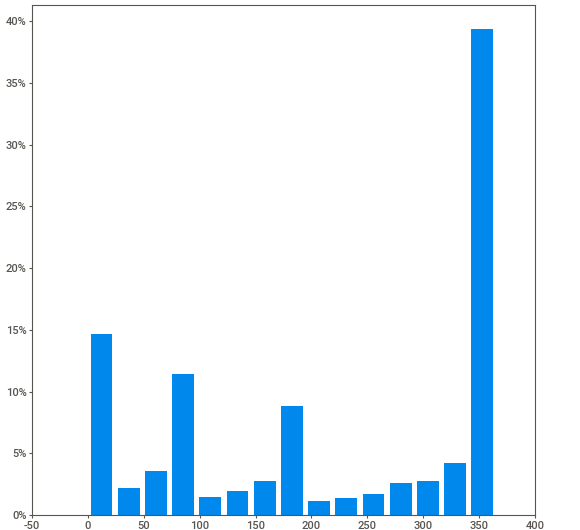
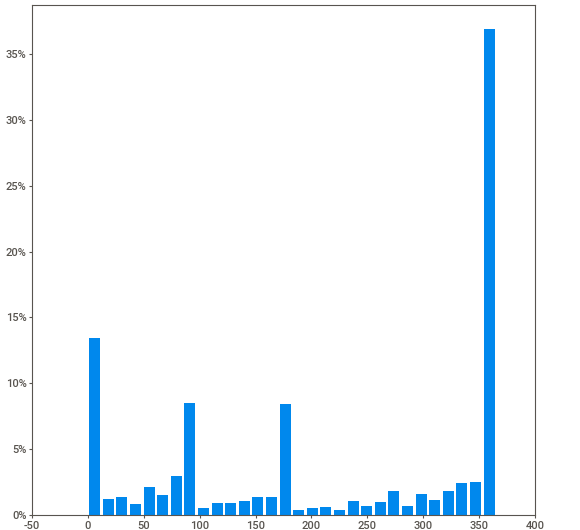
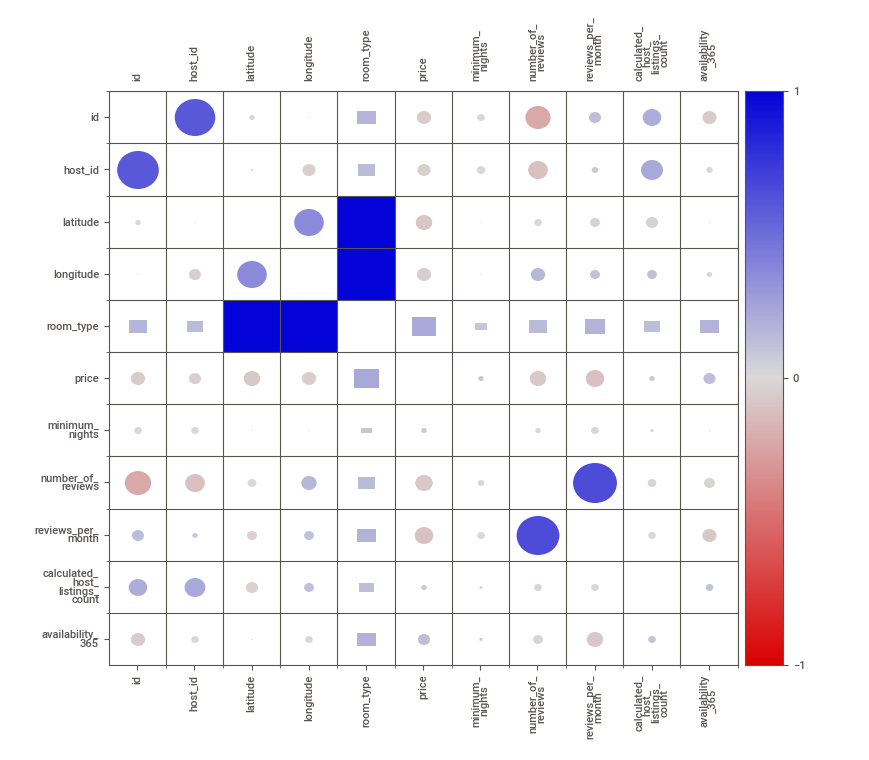
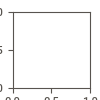

In [21]:
report_listings = sv.analyze(listings)

report_listings.show_notebook()